<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Исследование-тяжести-ДТП-по-видам-транспорта" data-toc-modified-id="Исследование-тяжести-ДТП-по-видам-транспорта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Исследование тяжести ДТП по видам транспорта</a></span></li><li><span><a href="#Влияние-освещения,-погодных-и-дорожных-условий" data-toc-modified-id="Влияние-освещения,-погодных-и-дорожных-условий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Влияние освещения, погодных и дорожных условий</a></span></li><li><span><a href="#Влияние-характеристик-транспорта-и-водителя-на-количество-ДТП" data-toc-modified-id="Влияние-характеристик-транспорта-и-водителя-на-количество-ДТП-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Влияние характеристик транспорта и водителя на количество ДТП</a></span></li></ul></li><li><span><a href="#Места-наибольшего-скопления-ДТП-с-участием-мотоциклов" data-toc-modified-id="Места-наибольшего-скопления-ДТП-с-участием-мотоциклов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Места наибольшего скопления ДТП с участием мотоциклов</a></span></li><li><span><a href="#Анализ-ДТП-в-динамике-за-период-наблюдений" data-toc-modified-id="Анализ-ДТП-в-динамике-за-период-наблюдений-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ ДТП в динамике за период наблюдений</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# ДТП

**Цель:** Определить является ли мотоцикл наиболее аварийноопасным средством передвижения.

**Задача:** Проанализировать распределение ДТП по видам транспорта. Также оценить тяжесть ДТП в зависимости от вида транспорта. Проработать возможные взаимосвязи характеристик транспорта, дорожных и погодных условий, и других с количеством и тяжестью ДТП.

План:

1. Проанализировать распределение ДТП по видам транспорта.
2. Оценить количество смертельных ДТП в зависимости от вида транспорта.
3. Оценить корреляцию признаков дорожных и погодных условий с количеством ДТП.
4. Проследить взаимосвязь характеристик транспорта с количеством ДТП.

6. Оценить другие взаимосвязи (количество участников и тяжесть ДТП, место ДТП и количество участников и т.п.)
7. Оценить места наибольшего скопления ДТП с участием мотоциклов.
8. Изучить динамику изменений количества ДТП с участием мотоциклов за период наблюдений.

In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics as stat
import numpy as np
from scipy import stats

from sklearn import preprocessing

import folium
from folium import Map, Marker, Choropleth
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings('ignore')

from itertools import chain

import json
from pandas.io.json import json_normalize

In [2]:
#этим кодом парсились вложенные списки в оригинальном файле

#df_list = []
#with open('geojsonfile','r',encoding='utf-8') as openfile:
#    dict = json.load(openfile)
    
#    for id, item in enumerate(dict['features']):
#        for row in item['properties']['vehicles']:
#            temp_df = pd.json_normalize(row,'participants',['year','brand','color','model','category'])
#            df_list.append(temp_df)
        #if id % 100 == 0:
            #print(id)
#    accumulated_df = pd.concat(df_list, ignore_index = True)
#    accumulated_df.to_csv('parsed.csv', sep = '\t')

In [3]:
#загружаем предварительно обработанные данные из вложенных списков features основного датафрейма

data = pd.read_csv('mycsvfile', sep = '\t')

In [4]:
data.head(5)

Unnamed: 0          role   gender  \
0           0      Водитель  Мужской   
1           1  Велосипедист  Мужской   
2           2      Водитель  Мужской   
3           3      Водитель  Мужской   
4           4      Водитель  Мужской   

                                          violations  \
0  ['Нарушение правил проезда пешеходного переход...   
1        ['Нарушение требований сигналов светофора']   
2                                                 []   
3                 ['Другие нарушения ПДД водителем']   
4                                                 []   

                                       health_status  \
0                                       Не пострадал   
1  Раненый, находящийся (находившийся)  на амбула...   
2                                       Не пострадал   
3  Раненый, находящийся (находившийся)  на амбула...   
4                                       Не пострадал   

   years_of_driving_experience    year   brand       color              model  \
0                          9.0  2015.0     BMW     Красный  Прочие модели BMW   
1                          NaN     NaN     NaN  Иные цвета                NaN   
2                         16.0  2016.0  TOYOTA      Черный              Camry   
3                         11.0  2015.0   SKODA       Белый              Rapid   
4                         15.0  2008.0  TOYOTA      Черный       Land Cruiser   

                                       category  
0                                     Мотоциклы  
1                                    Велосипеды  
2  С-класс (малый средний, компактный) до 4,3 м  
3                      В-класс (малый) до 3,9 м  
4                      В-класс (малый) до 3,9 м

In [5]:
data = data.rename(columns = {'category':'transport'})

In [6]:
#загружаем файл с основными данными

df = gpd.read_file('geojsonfile', lines=True)

In [7]:
df_cap = pd.concat([df,data], axis = 1, join = 'inner')

In [8]:
#загружаем координаты районов Москвы (в них есть ошибка, на данный момент исправить не представляется возможным.
#Некоторые районы имеют неверные границы)

regions = gpd.read_file('anothergeojsonfile')

In [9]:
#statuses = set(status for sublist in df_cap['participant_categories'] for status in sublist)

#for status in statuses:
#    df_cap = df_cap.assign(**{f'is_{status.lower().replace(" ", "_")}': df_cap['participant_categories'].apply(lambda x: status in x)})


In [10]:
df_cap.head()

id                                 tags  \
0  1578215  [Дорожно-транспортные происшествия]   
1  1578237  [Дорожно-транспортные происшествия]   
2  1578234  [Дорожно-транспортные происшествия]   
3  1578239  [Дорожно-транспортные происшествия]   
4  1578252  [Дорожно-транспортные происшествия]   

                                      light  \
0  В темное время суток, освещение включено   
1                       Светлое время суток   
2  В темное время суток, освещение включено   
3  В темное время суток, освещение включено   
4                       Светлое время суток   

                                   point  \
0  {'lat': 55.743458, 'long': 37.601433}   
1    {'lat': 55.76969, 'long': 37.58156}   
2  {'lat': 55.754358, 'long': 37.611988}   
3      {'lat': 55.0372, 'long': 37.5831}   
4      {'lat': 55.7364, 'long': 37.6986}   

                                              nearby       region scheme  \
0  [Многоквартирные жилые дома, Нерегулируемый пе...    Хамовники    700   
1  [Многоквартирные жилые дома, Регулируемый пере...  Пресненский    500   
2                         [Регулируемый перекрёсток]  Пресненский    110   
3  [Многоквартирные жилые дома, Остановка обществ...    Мещанский    820   
4  [Мост, эстакада, путепровод, Эстакада, путепро...    Таганский    070   

                     address     weather                category  ...  \
0  г Москва, ул Остоженка, 5  [Пасмурно]       Наезд на пешехода  ...   
1  г Москва, пл Тишинская, 3      [Ясно]  Наезд на велосипедиста  ...   
2   г Москва, ул Моховая, 11      [Ясно]            Столкновение  ...   
3   г Москва, пр-кт Мира, 42      [Ясно]       Наезд на пешехода  ...   
4    г Москва, ул Рабочая, 4      [Ясно]            Столкновение  ...   

           role   gender                                         violations  \
0      Водитель  Мужской  ['Нарушение правил проезда пешеходного переход...   
1  Велосипедист  Мужской        ['Нарушение требований сигналов светофора']   
2      Водитель  Мужской                                                 []   
3      Водитель  Мужской                 ['Другие нарушения ПДД водителем']   
4      Водитель  Мужской                                                 []   

                                       health_status  \
0                                       Не пострадал   
1  Раненый, находящийся (находившийся)  на амбула...   
2                                       Не пострадал   
3  Раненый, находящийся (находившийся)  на амбула...   
4                                       Не пострадал   

  years_of_driving_experience    year   brand       color              model  \
0                         9.0  2015.0     BMW     Красный  Прочие модели BMW   
1                         NaN     NaN     NaN  Иные цвета                NaN   
2                        16.0  2016.0  TOYOTA      Черный              Camry   
3                        11.0  2015.0   SKODA       Белый              Rapid   
4                        15.0  2008.0  TOYOTA      Черный       Land Cruiser   

                                      transport  
0                                     Мотоциклы  
1                                    Велосипеды  
2  С-класс (малый средний, компактный) до 4,3 м  
3                      В-класс (малый) до 3,9 м  
4                      В-класс (малый) до 3,9 м  

[5 rows x 32 columns]

In [11]:
#раскроем вложенные списки в необходимых далее столбцах

df_cap['weather'] = df_cap['weather'].explode().reset_index(drop = True)
df_cap['road_conditions'] = df_cap['road_conditions'].explode().reset_index(drop = True)
df['nearby'] = df['nearby'].explode(ignore_index = True)

In [12]:
df_cap.columns

Index(['id', 'tags', 'light', 'point', 'nearby', 'region', 'scheme', 'address',
       'weather', 'category', 'datetime', 'severity', 'vehicles', 'dead_count',
       'participants', 'injured_count', 'parent_region', 'road_conditions',
       'participants_count', 'participant_categories', 'geometry',
       'Unnamed: 0', 'role', 'gender', 'violations', 'health_status',
       'years_of_driving_experience', 'year', 'brand', 'color', 'model',
       'transport'],
      dtype='object')

In [13]:
df.head(5)

id                                 tags  \
0  1578215  [Дорожно-транспортные происшествия]   
1  1578237  [Дорожно-транспортные происшествия]   
2  1578234  [Дорожно-транспортные происшествия]   
3  1578239  [Дорожно-транспортные происшествия]   
4  1578252  [Дорожно-транспортные происшествия]   

                                      light  \
0  В темное время суток, освещение включено   
1                       Светлое время суток   
2  В темное время суток, освещение включено   
3  В темное время суток, освещение включено   
4                       Светлое время суток   

                                   point  \
0  {'lat': 55.743458, 'long': 37.601433}   
1    {'lat': 55.76969, 'long': 37.58156}   
2  {'lat': 55.754358, 'long': 37.611988}   
3      {'lat': 55.0372, 'long': 37.5831}   
4      {'lat': 55.7364, 'long': 37.6986}   

                                              nearby       region scheme  \
0  [Многоквартирные жилые дома, Нерегулируемый пе...    Хамовники    700   
1  [Многоквартирные жилые дома, Регулируемый пере...  Пресненский    500   
2                         [Регулируемый перекрёсток]  Пресненский    110   
3  [Многоквартирные жилые дома, Остановка обществ...    Мещанский    820   
4  [Мост, эстакада, путепровод, Эстакада, путепро...    Таганский    070   

                     address     weather                category  ...  \
0  г Москва, ул Остоженка, 5  [Пасмурно]       Наезд на пешехода  ...   
1  г Москва, пл Тишинская, 3      [Ясно]  Наезд на велосипедиста  ...   
2   г Москва, ул Моховая, 11      [Ясно]            Столкновение  ...   
3   г Москва, пр-кт Мира, 42      [Ясно]       Наезд на пешехода  ...   
4    г Москва, ул Рабочая, 4      [Ясно]            Столкновение  ...   

      severity                                           vehicles dead_count  \
0  С погибшими  [ { "year": 2015, "brand": "BMW", "color": "Кр...          1   
1       Легкий  [ { "year": null, "brand": null, "color": "Ины...          0   
2       Легкий  [ { "year": 2015, "brand": "SKODA", "color": "...          0   
3      Тяжёлый  [ { "year": 2008, "brand": "CITROEN", "color":...          0   
4       Легкий  [ { "year": 2000, "brand": "KAWASAKI", "color"...          0   

                                        participants injured_count  \
0  [ { "role": "Пешеход", "gender": "Женский", "v...             0   
1                                                [ ]             1   
2                                                [ ]             1   
3  [ { "role": "Пешеход", "gender": "Мужской", "v...             1   
4                                                [ ]             1   

   parent_region                                    road_conditions  \
0         Москва  [Сухое, Отсутствие дорожных знаков в необходим...   
1         Москва                                            [Сухое]   
2         Москва                                            [Сухое]   
3         Москва                                            [Сухое]   
4         Москва                                            [Сухое]   

  participants_count                   participant_categories  \
0                  2  [Пешеходы, Мотоциклисты, Все участники]   
1                  2           [Велосипедисты, Все участники]   
2                  2                          [Все участники]   
3                  2                [Пешеходы, Все участники]   
4                  2            [Мотоциклисты, Все участники]   

                    geometry  
0  POINT (37.60143 55.74346)  
1  POINT (37.58156 55.76969)  
2  POINT (37.61199 55.75436)  
3  POINT (37.58310 55.03720)  
4  POINT (37.69860 55.73640)  

[5 rows x 21 columns]

Нам нужны не все колонки, удалим те, что дублируют информацию, несут смежную информацию или неинформативны

In [15]:
df_cap = df_cap.drop(['violations','tags','nearby','scheme','color','vehicles', 'Unnamed: 0', 'geometry','address','participants','participant_categories'], axis = 1)

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df_cap.head(5)

id                                     light  \
0  1578215  В темное время суток, освещение включено   
1  1578237                       Светлое время суток   
2  1578234  В темное время суток, освещение включено   
3  1578239  В темное время суток, освещение включено   
4  1578252                       Светлое время суток   

                                   point       region   weather  \
0  {'lat': 55.743458, 'long': 37.601433}    Хамовники  Пасмурно   
1    {'lat': 55.76969, 'long': 37.58156}  Пресненский      Ясно   
2  {'lat': 55.754358, 'long': 37.611988}  Пресненский      Ясно   
3      {'lat': 55.0372, 'long': 37.5831}    Мещанский      Ясно   
4      {'lat': 55.7364, 'long': 37.6986}    Таганский      Ясно   

                 category            datetime     severity  dead_count  \
0       Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
1  Наезд на велосипедиста 2016-08-11 13:55:00       Легкий           0   
2            Столкновение 2016-08-12 21:45:00       Легкий           0   
3       Наезд на пешехода 2016-08-29 00:05:00      Тяжёлый           0   
4            Столкновение 2016-08-04 18:00:00       Легкий           0   

   injured_count parent_region  \
0              0        Москва   
1              1        Москва   
2              1        Москва   
3              1        Москва   
4              1        Москва   

                                   road_conditions  participants_count  \
0                                            Сухое                   2   
1  Отсутствие дорожных знаков в необходимых местах                   2   
2                                            Сухое                   2   
3                                            Сухое                   2   
4                                            Сухое                   2   

           role   gender                                      health_status  \
0      Водитель  Мужской                                       Не пострадал   
1  Велосипедист  Мужской  Раненый, находящийся (находившийся)  на амбула...   
2      Водитель  Мужской                                       Не пострадал   
3      Водитель  Мужской  Раненый, находящийся (находившийся)  на амбула...   
4      Водитель  Мужской                                       Не пострадал   

   years_of_driving_experience    year   brand              model  \
0                          9.0  2015.0     BMW  Прочие модели BMW   
1                          NaN     NaN     NaN                NaN   
2                         16.0  2016.0  TOYOTA              Camry   
3                         11.0  2015.0   SKODA              Rapid   
4                         15.0  2008.0  TOYOTA       Land Cruiser   

                                      transport  
0                                     Мотоциклы  
1                                    Велосипеды  
2  С-класс (малый средний, компактный) до 4,3 м  
3                      В-класс (малый) до 3,9 м  
4                      В-класс (малый) до 3,9 м

In [18]:
point = df_cap.point.apply(pd.Series) #раскроем информацию о координатах
df_cap = pd.concat([df_cap,point], axis = 1)
df_cap = df_cap.drop('point', axis = 1)

In [19]:
#переименуем дублирующиеся в результате слияния таблиц колонки
df_cap = df_cap.rename(columns = {df_cap.columns[4]:'reason'})

In [20]:
df_cap.head(5)

id                                     light       region   weather  \
0  1578215  В темное время суток, освещение включено    Хамовники  Пасмурно   
1  1578237                       Светлое время суток  Пресненский      Ясно   
2  1578234  В темное время суток, освещение включено  Пресненский      Ясно   
3  1578239  В темное время суток, освещение включено    Мещанский      Ясно   
4  1578252                       Светлое время суток    Таганский      Ясно   

                   reason            datetime     severity  dead_count  \
0       Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
1  Наезд на велосипедиста 2016-08-11 13:55:00       Легкий           0   
2            Столкновение 2016-08-12 21:45:00       Легкий           0   
3       Наезд на пешехода 2016-08-29 00:05:00      Тяжёлый           0   
4            Столкновение 2016-08-04 18:00:00       Легкий           0   

   injured_count parent_region  \
0              0        Москва   
1              1        Москва   
2              1        Москва   
3              1        Москва   
4              1        Москва   

                                   road_conditions  participants_count  \
0                                            Сухое                   2   
1  Отсутствие дорожных знаков в необходимых местах                   2   
2                                            Сухое                   2   
3                                            Сухое                   2   
4                                            Сухое                   2   

           role   gender                                      health_status  \
0      Водитель  Мужской                                       Не пострадал   
1  Велосипедист  Мужской  Раненый, находящийся (находившийся)  на амбула...   
2      Водитель  Мужской                                       Не пострадал   
3      Водитель  Мужской  Раненый, находящийся (находившийся)  на амбула...   
4      Водитель  Мужской                                       Не пострадал   

   years_of_driving_experience    year   brand              model  \
0                          9.0  2015.0     BMW  Прочие модели BMW   
1                          NaN     NaN     NaN                NaN   
2                         16.0  2016.0  TOYOTA              Camry   
3                         11.0  2015.0   SKODA              Rapid   
4                         15.0  2008.0  TOYOTA       Land Cruiser   

                                      transport        lat       long  
0                                     Мотоциклы  55.743458  37.601433  
1                                    Велосипеды  55.769690  37.581560  
2  С-класс (малый средний, компактный) до 4,3 м  55.754358  37.611988  
3                      В-класс (малый) до 3,9 м  55.037200  37.583100  
4                      В-класс (малый) до 3,9 м  55.736400  37.698600

У нас остались только необходимые колонки с информацией.

In [21]:
def info_func(data):

    data.info()
    print('___________________')
    
    #подсчитаем пропуски
    def count_null(data):
        print(f'В датафрейме {len(data)} записей')
        print(' ')
        for element in data.columns:
            if data[element].isna().sum()>0:
                print(f'Количество пропусков в колонке {element} = {data[element].isna().sum()}'),
            else:
                print(f'Пропусков в колонке {element} нет')
    count_null(data)
    print('___________________')
    
    
    #проверим наличие полных дубликатов
    print(f'Количество полных дубликатов: {data.duplicated().sum()}')
                
info_func(df_cap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72122 entries, 0 to 72121
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           72122 non-null  int64         
 1   light                        72122 non-null  object        
 2   region                       72122 non-null  object        
 3   weather                      72122 non-null  object        
 4   reason                       72122 non-null  object        
 5   datetime                     72122 non-null  datetime64[ns]
 6   severity                     72122 non-null  object        
 7   dead_count                   72122 non-null  int64         
 8   injured_count                72122 non-null  int64         
 9   parent_region                72122 non-null  object        
 10  road_conditions              72122 non-null  object        
 11  participants_count           72122 non-nu

У нас очень много пропусков для данных о стаже вождения. Удалить такое количество данных мы не можем, тем более, что действительно интересно посмотреть зависимость количества ДТП от этого показателя. Заменять на среднее или медианное значение тоже не можем, т.к. такие неточные данные могут сильно исказить картину. Оставим данные как есть.

Пропуски в колонке gender можно заменить на наиболее частое значение - их не так много, и они не повлияют на общий результат.
Строки с пропусками в координатах удалять не будем, т.к. эти признаки не сильно важны для нас, а другие данные не хочется терять.

Попробуем понять природу пропусков в колонках "years_of_driving_experience","year", "brand", "model", предположив, что для велосипедов эта информация не указывается.

Пропуски в остальных колонках оставим также как есть, т.к. эти признаки не так важны, как другие, по которым данные есть.

In [22]:
#для проверки гипотезы о пропусках выделим велосипеды в отдельный датафрейм

bikes = df_cap.query('transport == "Велосипеды"')

In [23]:
info_func(bikes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 1 to 71756
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           1039 non-null   int64         
 1   light                        1039 non-null   object        
 2   region                       1039 non-null   object        
 3   weather                      1039 non-null   object        
 4   reason                       1039 non-null   object        
 5   datetime                     1039 non-null   datetime64[ns]
 6   severity                     1039 non-null   object        
 7   dead_count                   1039 non-null   int64         
 8   injured_count                1039 non-null   int64         
 9   parent_region                1039 non-null   object        
 10  road_conditions              1039 non-null   object        
 11  participants_count           1039 non-null

Количество данных о велосипедах - виновниках ДТП небольшое - всего 1039 записей. Но, действительно, практически для всех не указан стаж вождения, для многих отсутствует информация о возрасте транспорта, модели, изготовителе.

In [24]:
df_cap['gender'].value_counts()

Мужской    53074
Женский    18036
Name: gender, dtype: int64

In [25]:
#заполним пропуски в колонке "пол" наиболее частым значением

df_cap['gender'] = df_cap['gender'].fillna(pd.Series.mode(df_cap['gender'])[0])

In [26]:
print(pd.Series.mode(df_cap['gender']))

0    Мужской
Name: gender, dtype: object


In [27]:
df_cap.head(3)

id                                     light       region   weather  \
0  1578215  В темное время суток, освещение включено    Хамовники  Пасмурно   
1  1578237                       Светлое время суток  Пресненский      Ясно   
2  1578234  В темное время суток, освещение включено  Пресненский      Ясно   

                   reason            datetime     severity  dead_count  \
0       Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
1  Наезд на велосипедиста 2016-08-11 13:55:00       Легкий           0   
2            Столкновение 2016-08-12 21:45:00       Легкий           0   

   injured_count parent_region  \
0              0        Москва   
1              1        Москва   
2              1        Москва   

                                   road_conditions  participants_count  \
0                                            Сухое                   2   
1  Отсутствие дорожных знаков в необходимых местах                   2   
2                                            Сухое                   2   

           role   gender                                      health_status  \
0      Водитель  Мужской                                       Не пострадал   
1  Велосипедист  Мужской  Раненый, находящийся (находившийся)  на амбула...   
2      Водитель  Мужской                                       Не пострадал   

   years_of_driving_experience    year   brand              model  \
0                          9.0  2015.0     BMW  Прочие модели BMW   
1                          NaN     NaN     NaN                NaN   
2                         16.0  2016.0  TOYOTA              Camry   

                                      transport        lat       long  
0                                     Мотоциклы  55.743458  37.601433  
1                                    Велосипеды  55.769690  37.581560  
2  С-класс (малый средний, компактный) до 4,3 м  55.754358  37.611988

In [28]:
df_cap['gender'].value_counts()

Мужской    54086
Женский    18036
Name: gender, dtype: int64

In [29]:
df_cap.isna().sum()

id                                 0
light                              0
region                             0
weather                            0
reason                             0
datetime                           0
severity                           0
dead_count                         0
injured_count                      0
parent_region                      0
road_conditions                    0
participants_count                 0
role                               0
gender                             0
health_status                    141
years_of_driving_experience    19491
year                            1689
brand                           1594
model                           1596
transport                          0
lat                               83
long                              83
dtype: int64

Для более простого дальнейшего анализа необходимо сгруппировать все виды транспорта по категориям. Посмотрим сколько уникальных значений и выделим группы.

In [30]:
df_cap.transport.unique()

array(['Мотоциклы', 'Велосипеды',
       'С-класс (малый средний, компактный) до 4,3 м',
       'В-класс (малый) до 3,9 м',
       'Е-класс (высший средний, бизнес-класс) до 4,9 м',
       'D-класс (средний) до 4,6 м',
       'Минивэны и универсалы повышенной вместимости', 'Фургоны',
       'Самосвалы', 'Одноэтажные длиной от 8 до 12 м',
       'Прочая спецтехника', 'Легковые автомобили (без типа)',
       'А-класс (особо малый) до 3,5 м', 'Бортовые', 'Седельные тягачи',
       'Прочие легковые автомобили',
       'Персональное электрическое средство передвижения малой мощности',
       'Одноэтажные длиной от 5 до 8 м',
       'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'Прочие одноярусные', 'Трамваи', 'Прочие грузовые автомобили',
       'S-класс (высший, представительский класс) более 4,9 м', 'Иные ТС',
       'Транспортные средства оперативно-служебные для перевозки лиц, находящихся под стражей',
       'Квадрициклы', 'Троллейбусы',
       'Иные дорожно-стро

In [31]:
cars = ['А-класс (особо малый) до 3,5 м','С-класс (малый средний, компактный) до 4,3 м','В-класс (малый) до 3,9 м', \
            'Е-класс (высший средний, бизнес-класс) до 4,9 м','D-класс (средний) до 4,6 м','Легковые автомобили (без типа)', \
            'Прочие легковые автомобили','S-класс (высший, представительский класс) более 4,9 м', \
            'Минивэны и универсалы повышенной вместимости', 'Спортивные (гоночные)']

moto = ['Мотоциклы','Мотороллеры', 'Мопеды с двигателем внутреннего сгорания более 50 см. куб.', 'Мотоколяски', \
        'Иные мототранспортные средства', 'Мототранспорт (без типа)']

houses = ['Одноэтажные длиной от 8 до 12 м', 'Одноэтажные длиной от 5 до 8 м', 'Прочие одноярусные', \
            'Одноэтажные, сочлененные длиной более 12 м','Прочие одноэтажные','Одноэтажные длиной не более 5 м']

spec = ['Самосвалы', 'Прочая спецтехника', 'Бортовые', 'Седельные тягачи', 'Фургоны', 'Прочие грузовые автомобили', \
            'Иные дорожно-строительные и дорожно-эксплуатационные машины и механизмы', 'Бортовые грузовые автомобили', \
            'Рефрижераторы', 'Спецтехника (без типа)', 'Автокраны и транспортные средства, оснащенные кранами-манипуляторами', \
            'Тракторы', 'Оснащённые специализированным оборудованием  автотранспортные средства для коммунального хозяйства и  содержания дорог', \
            'Транспортные средства для перевозки денежной выручки и ценных грузов', \
            'Медицинские комплексы на шасси транспортных средств', 'Автобетоносмесители', \
            'Специализированная снегоуборочная техника', 'Автобетононасосы', 'Автогрейдеры', 'Фронтальные погрузчики', \
            'Цистерны', 'Грузовые автомобили (без типа)', 'Оснащённые специализированным оборудованием автотранспортные средства аварийно-спасательных служб и полиции', \
            'Экскаваторы', 'Полуприцепы-фургоны', 'Автоцементовозы','Транспортные средства для перевозки нефтепродуктов', \
            'Пожарные автомобили','Автогудронаторы', 'Специализированная техника МВД', \
            'Транспортные средства, оснащенные подъемниками с рабочими платформами', \
            'Самоходные машины и механизмы сельскохозяйственного назначения','Тягачи', \
            'Транспортные средства оперативно-служебные для перевозки лиц, находящихся под стражей', \
            'Автомобили скорой медицинской помощи', 'Автоэвакуаторы']

public = ['Трамваи', 'Троллейбусы', 'Автобусы (без типа)', 'Электробусы']


In [32]:
transport_category = []

for row in df_cap['transport']:
    if row in cars:
        transport_category.append('легковой')
    elif row in moto:
        transport_category.append('мототранспорт')
    elif row in houses:
        transport_category.append('дома')
    elif row in spec:
        transport_category.append('спецтранспорт/грузовой')
    elif row in public:
        transport_category.append('общественный')
    else:
        transport_category.append('прочий')

In [33]:
df_cap['transport_category'] = pd.Series(transport_category)

Для поиска зависимостей ДТП от погодных условий нужно задать уникальным значениям числовые характеристики.

In [34]:
df_cap['weather'].unique()

array(['Пасмурно', 'Ясно', 'Снегопад', 'Дождь', 'Туман',
       'Температура выше +30С', 'Метель', 'Температура ниже -30С',
       'Ураганный ветер'], dtype=object)

In [35]:
df_cap['light'].unique()

array(['В темное время суток, освещение включено', 'Светлое время суток',
       'Сумерки', 'В темное время суток, освещение отсутствует',
       'В темное время суток, освещение не включено', 'Не установлено'],
      dtype=object)

Заменим некоторые похожие значения в колонке light.

In [36]:
df_cap['light'] = df_cap['light'].str.replace('В темное время суток, освещение не включено', 'В темное время суток, освещение отсутствует')

In [37]:
df_cap['road_conditions'].unique()

array(['Сухое', 'Отсутствие дорожных знаков в необходимых местах',
       'Мокрое', 'Обработанное противогололедными материалами',
       'Отсутствие, плохая различимость горизонтальной разметки проезжей части',
       'Отсутствие, плохая различимость вертикальной разметки',
       'Отсутствие пешеходных ограждений в необходимых местах',
       'Заснеженное', 'Недостатки зимнего содержания',
       'Неправильное применение, плохая видимость дорожных знаков',
       'Гололедица', 'Со снежным накатом',
       'Отсутствие дорожных ограждений в необходимых местах',
       'Загрязненное',
       'Отсутствие временных ТСОД в местах проведения работ',
       'Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств',
       'Неисправность светофора',
       'Отсутствие тротуаров (пешеходных дорожек)',
       'Неисправное освещение', 'Неудовлетворительное состояние обочин',
       'Плохая видимость светофора',
       'Несоответствие дорожных ограждений предъявляе

В колонке с дорожными условиями также необходимо создать категории для упрощения анализа.

In [38]:
wet = ['Мокрое', 'Залитое (покрытое) водой']
dry = ['Сухое']
snow = ['Обработанное противогололедными материалами', 'Заснеженное', 'Недостатки зимнего содержания','Гололедица', 
        'Со снежным накатом']
road_signs = ['Отсутствие дорожных знаков в необходимых местах', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части',
               'Отсутствие, плохая различимость вертикальной разметки', 'Неправильное применение, плохая видимость дорожных знаков', 
               'Неудовлетворительное состояние разделительной полосы', 'Плохая видимость светофора','Неисправность светофора']
road_objects = ['Отсутствие направляющих устройств и световозвращающих элементов на них', 
               'Плохая видимость световозвращателей, размещенных на дорожных ограждениях',
               'Отсутствие пешеходных ограждений в необходимых местах',
               'Неудовлетворительное состояние обочин','Отсутствие тротуаров (пешеходных дорожек)',
               'Отсутствие элементов обустройства остановочного пункта общественного пассажирского транспорта']
maintenance = ['Отсутствие временных ТСОД в местах проведения работ', 'Отсутствие дорожных ограждений в необходимых местах', 
               'Несоответствие дорожных ограждений предъявляемым требованиям', 'Свежеуложенная поверхностная обработка',
               'Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств', 
               'Нарушения в размещении наружной рекламы']
road_defects = ['Загрязненное', 'Несоответствие люков смотровых колодцев и ливневой канализации предъявляемым требованиям', 
                'Неровное покрытие', 'Дефекты покрытия', 'Несоответствие железнодорожного переезда предъявляемым требованиям', 
                'Низкие сцепные качества покрытия']
visibility = ['Неисправное освещение', 'Отсутствие освещения', 'Недостаточное освещение', 'Ограничение видимости', 'Пыльное']


condition_char = []
for row in df_cap['road_conditions']:
    if row in wet:
        condition_char.append('Мокрое')
    elif row in dry:
        condition_char.append('Сухое')
    elif row in snow:
        condition_char.append('Заснеженное')
    elif row in road_signs:
        condition_char.append('Нарушение размещения дорожных знаков и разметки')
    elif row in road_objects:
        condition_char.append('Нарушение размещения дорожных ограждений и объектов')
    elif row in maintenance:
        condition_char.append('Препятствия и ремонт')
    elif row in road_defects:
        condition_char.append('Дефекты покрытия')
    elif row in visibility:
        condition_char.append('Плохая видимость')
    else:
        condition_char.append('Прочие дорожные условия')

In [39]:
df_cap['road_condition_char'] = pd.Series(condition_char)

In [40]:
df_cap = df_cap.drop('road_conditions', axis=1) #убираем лишнюю колонку

In [41]:
#проранжируем колонки с погодными условиями, освещенностью и состояние дорожного покрытия

rated_weather = pd.get_dummies(df_cap['weather'])
rated_light = pd.get_dummies(df_cap['light'])
rated_road_cond = pd.get_dummies(df_cap['road_condition_char'])

In [42]:
#теперь соединим основной датафрейм и ранжированные данные
df_cap = pd.concat([df_cap,rated_weather,rated_light,rated_road_cond],axis = 1)

df_cap.head(5)

id                                     light       region   weather  \
0  1578215  В темное время суток, освещение включено    Хамовники  Пасмурно   
1  1578237                       Светлое время суток  Пресненский      Ясно   
2  1578234  В темное время суток, освещение включено  Пресненский      Ясно   
3  1578239  В темное время суток, освещение включено    Мещанский      Ясно   
4  1578252                       Светлое время суток    Таганский      Ясно   

                   reason            datetime     severity  dead_count  \
0       Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
1  Наезд на велосипедиста 2016-08-11 13:55:00       Легкий           0   
2            Столкновение 2016-08-12 21:45:00       Легкий           0   
3       Наезд на пешехода 2016-08-29 00:05:00      Тяжёлый           0   
4            Столкновение 2016-08-04 18:00:00       Легкий           0   

   injured_count parent_region  participants_count          role   gender  \
0              0        Москва                   2      Водитель  Мужской   
1              1        Москва                   2  Велосипедист  Мужской   
2              1        Москва                   2      Водитель  Мужской   
3              1        Москва                   2      Водитель  Мужской   
4              1        Москва                   2      Водитель  Мужской   

                                       health_status  \
0                                       Не пострадал   
1  Раненый, находящийся (находившийся)  на амбула...   
2                                       Не пострадал   
3  Раненый, находящийся (находившийся)  на амбула...   
4                                       Не пострадал   

   years_of_driving_experience    year   brand              model  \
0                          9.0  2015.0     BMW  Прочие модели BMW   
1                          NaN     NaN     NaN                NaN   
2                         16.0  2016.0  TOYOTA              Camry   
3                         11.0  2015.0   SKODA              Rapid   
4                         15.0  2008.0  TOYOTA       Land Cruiser   

                                      transport        lat       long  \
0                                     Мотоциклы  55.743458  37.601433   
1                                    Велосипеды  55.769690  37.581560   
2  С-класс (малый средний, компактный) до 4,3 м  55.754358  37.611988   
3                      В-класс (малый) до 3,9 м  55.037200  37.583100   
4                      В-класс (малый) до 3,9 м  55.736400  37.698600   

  transport_category                              road_condition_char  Дождь  \
0      мототранспорт                                            Сухое      0   
1             прочий  Нарушение размещения дорожных знаков и разметки      0   
2           легковой                                            Сухое      0   
3           легковой                                            Сухое      0   
4           легковой                                            Сухое      0   

   Метель  Пасмурно  Снегопад  Температура выше +30С  Температура ниже -30С  \
0       0         1         0                      0                      0   
1       0         0         0                      0                      0   
2       0         0         0                      0                      0   
3       0         0         0                      0                      0   
4       0         0         0                      0                      0   

   Туман  Ураганный ветер  Ясно  В темное время суток, освещение включено  \
0      0                0     0                                         1   
1      0                0     1                                         0   
2      0                0     1                                         1   
3      0                0     1                                         1   
4      0                0     1                                         0   

   В темное вре

Создадим еще одну колонку - с годом, когда произошло ДТП.

In [43]:
df_cap['accident_year'] = df_cap['datetime'].dt.year

***В открытом доступе информации о количестве транспортных средств по видам транспорта в динамике нет. Удалось собрать некоторые цифры в статьях и пресс-релизах Автостат и федеральных ведомств.***

In [44]:
#названия колонок соответствуют году, на конец которого получены данные

d = {'transport_category':['мототранспорт','легковой'],'2022y': [101000, np.NaN], '2020y': [np.NaN, 3600000], '2019y': [85300,np.NaN]}
stat = pd.DataFrame(data=d)
stat


transport_category     2022y      2020y    2019y
0      мототранспорт  101000.0        NaN  85300.0
1           легковой       NaN  3600000.0      NaN

## Исследовательский анализ

In [45]:
df_cap.groupby('transport_category')['id'].count()

transport_category
дома                       5170
легковой                  54725
мототранспорт              2999
общественный               1166
прочий                     1818
спецтранспорт/грузовой     6244
Name: id, dtype: int64

Посмотрим на распределение ДТП по видам транспорта.

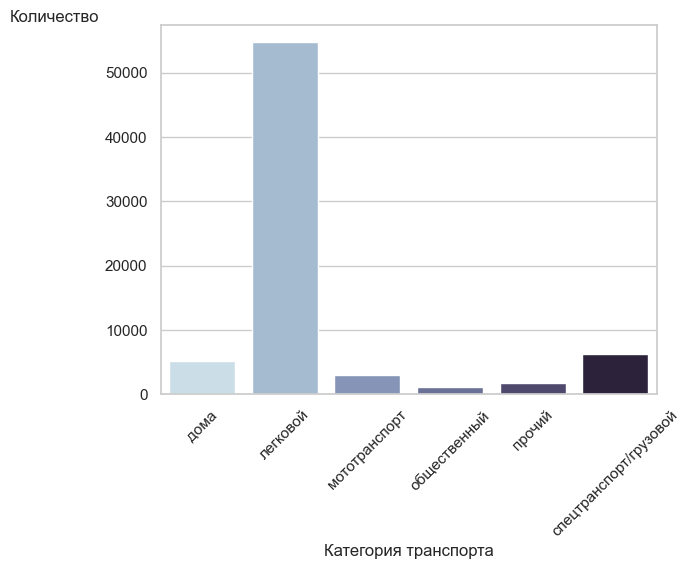

In [46]:
sns.set_theme(style="whitegrid")

sns.countplot(df_cap['transport_category'].sort_values(), palette = "ch:s=.25,rot=-.25")
plt.xlabel('Категория транспорта')
plt.ylabel('Количество',loc = 'top', rotation = 0)
plt.xticks(rotation = 45);

Ожидаемо, что количество ДТП с легковым транспортом гораздо больше, чем с другими видами транспорта. Но это, скорее всего, обусловлено количеством легкового транспорта. 

На основе собранной в публикациях информации, сравним относительное количество ДТП на мототранспорте и легковом транспорте.

In [47]:
df_cap_compare = df_cap.pivot_table(columns = 'accident_year', index = 'transport_category', values = 'id', 
                                      aggfunc = 'count').reset_index()
df_cap_compare = df_cap_compare.merge(stat, on = 'transport_category', how = 'inner')
df_cap_compare = df_cap_compare.drop([2015, 2016, 2017, 2018, 2021, 2023], axis = 1)
df_cap_compare

transport_category  2019  2020  2022     2022y      2020y    2019y
0           легковой  7120  6022  5867       NaN  3600000.0      NaN
1      мототранспорт   366   337   344  101000.0        NaN  85300.0

In [48]:
df_cap_compare['prct_2019'] = df_cap_compare[2019] / df_cap_compare['2019y'] *100
df_cap_compare['prct_2020'] = df_cap_compare[2020] / df_cap_compare['2020y'] *100
df_cap_compare['prct_2022'] = df_cap_compare[2022] / df_cap_compare['2022y'] *100
df_cap_compare = df_cap_compare.drop([2019,2020,2022,'2022y','2020y','2019y'], axis = 1)
df_cap_compare['prct_mean'] = df_cap_compare.mean(axis = 1)
df_cap_compare

transport_category  prct_2019  prct_2020  prct_2022  prct_mean
0           легковой        NaN   0.167278        NaN   0.167278
1      мототранспорт   0.429074        NaN   0.340594   0.384834

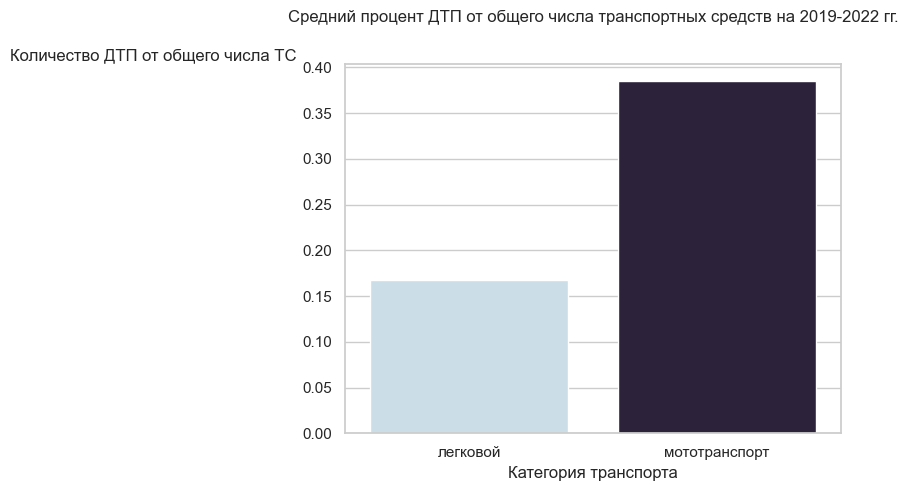

In [49]:
sns.barplot(data = df_cap_compare, x = 'transport_category', y = 'prct_mean', palette = "ch:s=.25,rot=-.25")
plt.title('Средний процент ДТП от общего числа транспортных средств на 2019-2022 гг.', pad = 30)
plt.xlabel('Категория транспорта')
plt.ylabel('Количество ДТП от общего числа ТС', loc = 'top', rotation = 0);

Даже на таких минимальных данных видно, что относительное количество ДТП на мототранспорте существенно выше относительного количества ДТП на легковом транспорте.

### Исследование тяжести ДТП по видам транспорта

In [50]:
df_cap.dead_count.value_counts()

0    68686
1     3214
2      175
3       38
4        8
8        1
Name: dead_count, dtype: int64

In [51]:
deaths = df_cap.groupby(['transport_category','dead_count']).agg({'id':'count'}).reset_index()
deaths['prct'] = deaths['id'] / deaths.groupby('transport_category')['id'].transform('sum')*100


In [52]:
deaths

transport_category  dead_count     id       prct
0                     дома           0   4922  95.203095
1                     дома           1    233   4.506770
2                     дома           2     14   0.270793
3                     дома           3      1   0.019342
4                 легковой           0  52108  95.217908
5                 легковой           1   2454   4.484239
6                 легковой           2    126   0.230242
7                 легковой           3     32   0.058474
8                 легковой           4      4   0.007309
9                 легковой           8      1   0.001827
10           мототранспорт           0   2860  95.365122
11           мототранспорт           1    123   4.101367
12           мототранспорт           2     14   0.466822
13           мототранспорт           3      1   0.033344
14           мототранспорт           4      1   0.033344
15            общественный           0   1111  95.283019
16            общественный           1     53   4.545455
17            общественный           2      2   0.171527
18                  прочий           0   1739  95.654565
19                  прочий           1     75   4.125413
20                  прочий           2      4   0.220022
21  спецтранспорт/грузовой           0   5946  95.227418
22  спецтранспорт/грузовой           1    276   4.420243
23  спецтранспорт/грузовой           2     15   0.240231
24  спецтранспорт/грузовой           3      4   0.064061
25  спецтранспорт/грузовой           4      3   0.048046

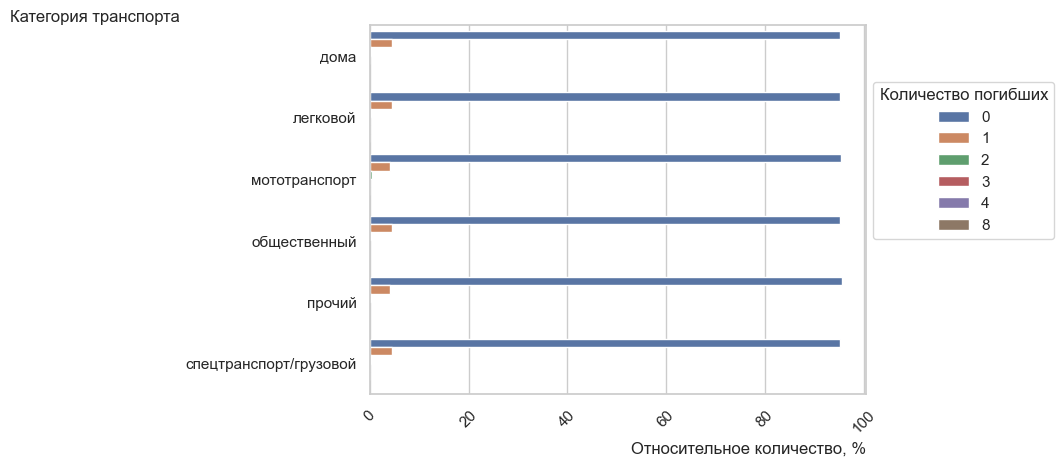

In [53]:
sns.barplot(data = deaths, y = 'transport_category', x = 'prct', hue = 'dead_count', orient = 'h')
plt.ylabel('Категория транспорта', loc = 'top', rotation = 0)
plt.xlabel('Относительное количество, %',loc = 'right', rotation = 0)
plt.legend(title = 'Количество погибших', bbox_to_anchor=(1, 0.4))
plt.xticks(rotation = 45);

Как видно из графика и таблиц, распределение количества погибших в ДТП распределено между всеми категориями транспорта практически одинаково - более 95% ДТП происходят без жертв, и 4-4,5% ДТП заканчиваются одной смертью. ДТП с легковыми автомобилями также имеют статистику с 8 жертвами - это самый большой показатель погибших.

In [54]:
severity = df_cap.groupby(['transport_category','severity']).agg({'id':'count'}).reset_index()
severity['prct'] = severity['id'] / severity.groupby('transport_category')['id'].transform('sum')*100
severity

transport_category     severity     id       prct
0                     дома       Легкий   3648  70.560928
1                     дома  С погибшими    248   4.796905
2                     дома      Тяжёлый   1274  24.642166
3                 легковой       Легкий  38650  70.625857
4                 легковой  С погибшими   2617   4.782092
5                 легковой      Тяжёлый  13458  24.592051
6            мототранспорт       Легкий   2127  70.923641
7            мототранспорт  С погибшими    139   4.634878
8            мототранспорт      Тяжёлый    733  24.441480
9             общественный       Легкий    836  71.698113
10            общественный  С погибшими     55   4.716981
11            общественный      Тяжёлый    275  23.584906
12                  прочий       Легкий   1276  70.187019
13                  прочий  С погибшими     79   4.345435
14                  прочий      Тяжёлый    463  25.467547
15  спецтранспорт/грузовой       Легкий   4478  71.716848
16  спецтранспорт/грузовой  С погибшими    298   4.772582
17  спецтранспорт/грузовой      Тяжёлый   1468  23.510570

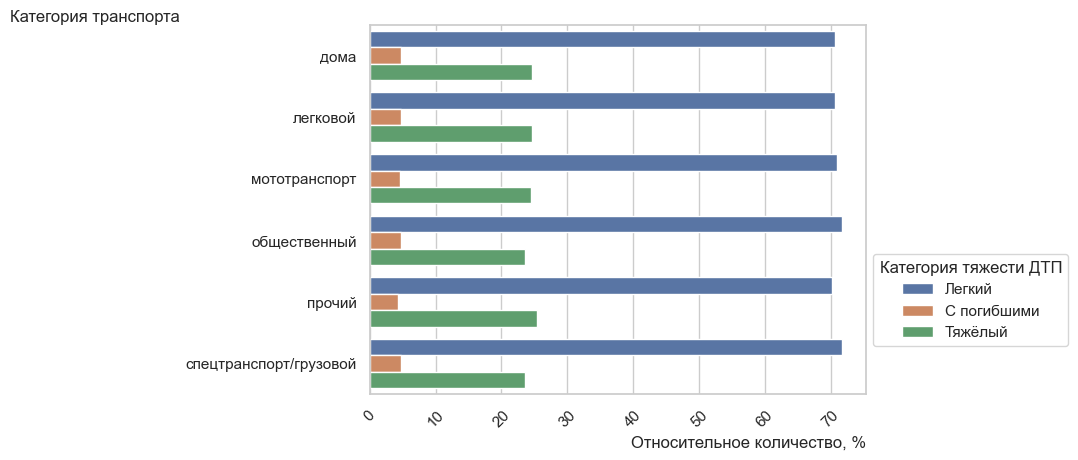

In [55]:
sns.barplot(data = severity, y = 'transport_category', x = 'prct', hue = 'severity', orient = 'h')
plt.ylabel('Категория транспорта', loc = 'top', rotation = 0)
plt.xlabel('Относительное количество, %',loc = 'right', rotation = 0)
plt.legend(title = 'Категория тяжести ДТП', bbox_to_anchor=(1, 0.4))
plt.xticks(rotation = 45);

Распределение ДТП по тяжести также не имеет особого различия между видами транспорта - чуть более 70% приходится на легкие ДТП, около 25% приходится на тяжелые, и около 5% - на смертельные ДТП.

### Влияние освещения, погодных и дорожных условий

Теперь посмотрим на зависимости количества ДТП от погодных и дорожных условий.

In [56]:
df_cap[df_cap['transport_category'] == 'мототранспорт']['Снегопад'].sum()

71

Занятный факт - мотоциклисты катались при снегопаде :-)

In [57]:
df_cap.columns

Index(['id', 'light', 'region', 'weather', 'reason', 'datetime', 'severity',
       'dead_count', 'injured_count', 'parent_region', 'participants_count',
       'role', 'gender', 'health_status', 'years_of_driving_experience',
       'year', 'brand', 'model', 'transport', 'lat', 'long',
       'transport_category', 'road_condition_char', 'Дождь', 'Метель',
       'Пасмурно', 'Снегопад', 'Температура выше +30С',
       'Температура ниже -30С', 'Туман', 'Ураганный ветер', 'Ясно',
       'В темное время суток, освещение включено',
       'В темное время суток, освещение отсутствует', 'Не установлено',
       'Светлое время суток', 'Сумерки', 'Дефекты покрытия', 'Заснеженное',
       'Мокрое', 'Нарушение размещения дорожных знаков и разметки',
       'Нарушение размещения дорожных ограждений и объектов',
       'Плохая видимость', 'Препятствия и ремонт', 'Прочие дорожные условия',
       'Сухое', 'accident_year'],
      dtype='object')

In [58]:
conditions_grouped = df_cap.groupby('transport_category')[['Дождь', 'Метель',
       'Пасмурно', 'Снегопад', 'Температура выше +30С',
       'Температура ниже -30С', 'Туман', 'Ураганный ветер', 'Ясно',
       'В темное время суток, освещение включено',
       'В темное время суток, освещение отсутствует', 'Не установлено',
       'Светлое время суток', 'Сумерки', 'Дефекты покрытия', 'Заснеженное',
       'Мокрое', 'Нарушение размещения дорожных знаков и разметки',
       'Нарушение размещения дорожных ограждений и объектов',
       'Плохая видимость', 'Препятствия и ремонт', 'Прочие дорожные условия',
       'Сухое']].sum()

In [59]:
#выведем результирующую строку

conditions_grouped.loc['Total',:] = conditions_grouped.sum(axis=0)


In [60]:
conditions_grouped

Дождь  Метель  Пасмурно  Снегопад  \
transport_category                                           
дома                     230.0     0.0    2606.0     121.0   
легковой                2353.0    18.0   28390.0    1309.0   
мототранспорт            135.0     0.0    1565.0      71.0   
общественный              60.0     0.0     610.0      32.0   
прочий                    85.0     1.0     914.0      41.0   
спецтранспорт/грузовой   281.0     0.0    3250.0     155.0   
Total                   3144.0    19.0   37335.0    1729.0   

                        Температура выше +30С  Температура ниже -30С  Туман  \
transport_category                                                            
дома                                      0.0                    0.0    2.0   
легковой                                 27.0                    2.0   26.0   
мототранспорт                             3.0                    0.0    1.0   
общественный                              0.0                    0.0    0.0   
прочий                                    1.0                    0.0    1.0   
спецтранспорт/грузовой                    2.0                    0.0    1.0   
Total                                    33.0                    2.0   31.0   

                        Ураганный ветер     Ясно  \
transport_category                                 
дома                                0.0   2211.0   
легковой                            0.0  22600.0   
мототранспорт                       0.0   1224.0   
общественный                        0.0    464.0   
прочий                              1.0    774.0   
спецтранспорт/грузовой              0.0   2555.0   
Total                               1.0  29828.0   

                        В темное время суток, освещение включено  \
transport_category                                                 
дома                                                      2013.0   
легковой                                                 21097.0   
мототранспорт                                             1146.0   
общественный                                               459.0   
прочий                                                     691.0   
спецтранспорт/грузовой                                    2395.0   
Total                                                    27801.0   

                        В темное время суток, освещение отсутствует  \
transport_category                                                    
дома                                                           49.0   
легковой                                                      439.0   
мототранспорт                                                  23.0   
общественный                                                   13.0   
прочий                                                         23.0   
спецтранспорт/грузовой                                         65.0   
Total                                                         612.0   

                        Не установлено  Светлое время суток  Сумерки  \
transport_category                                                     
дома                               0.0               3042.0     66.0   
легковой                           1.0              32358.0    830.0   
мототранспорт                      0.0               1782.0     48.0   
общественный                       0.0                676.0     18.0   
прочий                             0.0               1078.0     26.0   
спецтранспорт/грузовой             0.0               3698.0     86.0   
Total                              1.0              42634.0   1074.0   

                        Дефекты покрытия  Заснеженное   Мокрое  \
transport_category                                               
дома                                29.0        528.0   1097.0   
легковой                           281.0       6062.0  12308.0   
мототранспорт                       14.0        324.0    665.0   
общественный                         7.0        145.0

Удалим из основной таблицы строки и столбцы со значениями колонок погодных, дорожных и световых условий менее 100. Нас больше всего интересуют ДТП с мотоциклами, а они в этих условиях почти не участвуют.

In [61]:
df_cap = df_cap.drop(['Метель','Температура выше +30С','Температура ниже -30С','Туман','Ураганный ветер','Не установлено'],axis=1)


In [62]:
moto_weather = ['Дождь','Пасмурно','Снегопад','Туман','Ясно']

In [64]:
df_cap = df_cap.query('weather in @moto_weather')

Заново сформируем таблицу по погодным условиям.

In [65]:
conditions_grouped = df_cap.groupby('transport_category')[['Дождь',
       'Пасмурно', 'Снегопад', 'Ясно', 'В темное время суток, освещение включено',
       'В темное время суток, освещение отсутствует', 'Светлое время суток', 'Сумерки', 'Дефекты покрытия', 'Заснеженное',
       'Мокрое', 'Нарушение размещения дорожных знаков и разметки',
       'Нарушение размещения дорожных ограждений и объектов',
       'Плохая видимость', 'Препятствия и ремонт', 'Прочие дорожные условия',
       'Сухое']].sum()

In [66]:
#выведем результирующую строку

conditions_grouped.loc['Total',:] = conditions_grouped.sum(axis=0)


In [67]:
conditions_grouped

Дождь  Пасмурно  Снегопад     Ясно  \
transport_category                                            
дома                     230.0    2606.0     121.0   2211.0   
легковой                2353.0   28390.0    1309.0  22600.0   
мототранспорт            135.0    1565.0      71.0   1224.0   
общественный              60.0     610.0      32.0    464.0   
прочий                    85.0     914.0      41.0    774.0   
спецтранспорт/грузовой   281.0    3250.0     155.0   2555.0   
Total                   3144.0   37335.0    1729.0  29828.0   

                        В темное время суток, освещение включено  \
transport_category                                                 
дома                                                      2013.0   
легковой                                                 21083.0   
мототранспорт                                             1144.0   
общественный                                               459.0   
прочий                                                     690.0   
спецтранспорт/грузовой                                    2393.0   
Total                                                    27782.0   

                        В темное время суток, освещение отсутствует  \
transport_category                                                    
дома                                                           49.0   
легковой                                                      439.0   
мототранспорт                                                  23.0   
общественный                                                   13.0   
прочий                                                         23.0   
спецтранспорт/грузовой                                         65.0   
Total                                                         612.0   

                        Светлое время суток  Сумерки  Дефекты покрытия  \
transport_category                                                       
дома                                 3042.0     66.0              29.0   
легковой                            32325.0    830.0             281.0   
мототранспорт                        1781.0     48.0              14.0   
общественный                          676.0     18.0               7.0   
прочий                               1076.0     26.0              11.0   
спецтранспорт/грузовой               3698.0     86.0              34.0   
Total                               42598.0   1074.0             376.0   

                        Заснеженное   Мокрое  \
transport_category                             
дома                          528.0   1097.0   
легковой                     6054.0  12300.0   
мототранспорт                 324.0    664.0   
общественный                  145.0    286.0   
прочий                        190.0    413.0   
спецтранспорт/грузовой        693.0   1459.0   
Total                        7934.0  16219.0   

                        Нарушение размещения дорожных знаков и разметки  \
transport_category                                                        
дома                                                              707.0   
легковой                                                         7162.0   
мототранспорт                                                     408.0   
общественный                                                      136.0   
прочий                                                            237.0   
спецтранспорт/грузовой                                            771.0   
Total                                                            9421.0   

                        Нарушение размещения дорожных ограждений и объектов  \
transport_category                                                            
дома                                                                 52.0     
легковой                                                            629.0     
мототранспорт                                                        29.0     
общественный                     

In [68]:
#нормализуем значения, чтобы на heatmap была более наглядная картина

conditions_grouped_norm = preprocessing.normalize(conditions_grouped)
conditions_grouped_norm = pd.DataFrame(conditions_grouped_norm, columns = conditions_grouped.columns, index = conditions_grouped.index)
conditions_grouped_norm


Дождь  Пасмурно  Снегопад      Ясно  \
transport_category                                               
дома                    0.039223  0.444414  0.020635  0.377053   
легковой                0.038063  0.459247  0.021175  0.365585   
мототранспорт           0.039804  0.461434  0.020934  0.360892   
общественный            0.045973  0.467389  0.024519  0.355522   
прочий                  0.041442  0.445625  0.019990  0.377367   
спецтранспорт/грузовой  0.039818  0.460525  0.021964  0.362044   
Total                   0.038585  0.458192  0.021219  0.366063   

                        В темное время суток, освещение включено  \
transport_category                                                 
дома                                                    0.343287   
легковой                                                0.341046   
мототранспорт                                           0.337304   
общественный                                            0.351691   
прочий                                                  0.336413   
спецтранспорт/грузовой                                  0.339088   
Total                                                   0.340953   

                        В темное время суток, освещение отсутствует  \
transport_category                                                    
дома                                                       0.008356   
легковой                                                   0.007101   
мототранспорт                                              0.006781   
общественный                                               0.009961   
прочий                                                     0.011214   
спецтранспорт/грузовой                                     0.009211   
Total                                                      0.007511   

                        Светлое время суток   Сумерки  Дефекты покрытия  \
transport_category                                                        
дома                               0.518768  0.011255          0.004946   
легковой                           0.522900  0.013426          0.004546   
мототранспорт                      0.525121  0.014153          0.004128   
общественный                       0.517959  0.013792          0.005363   
прочий                             0.524609  0.012676          0.005363   
спецтранспорт/грузовой             0.524007  0.012186          0.004818   
Total                              0.522782  0.013181          0.004614   

                        Заснеженное    Мокрое  \
transport_category                              
дома                       0.090043  0.187077   
легковой                   0.097932  0.198969   
мототранспорт              0.095530  0.195778   
общественный               0.111101  0.219137   
прочий                     0.092635  0.201360   
спецтранспорт/грузовой     0.098198  0.206740   
Total                      0.097370  0.199047   

                        Нарушение размещения дорожных знаков и разметки  \
transport_category                                                        
дома                                                           0.120568   
легковой                                                       0.115855   
мототранспорт                                                  0.120297   
общественный                                                   0.104205   
прочий                                                         0.115550   
спецтранспорт/грузовой                                         0.109251   
Total                                                          0.115619   

                        Нарушение размещения дорожных ограждений и объектов  \
transport_category                                                            
дома                                                             0.008868     
легковой                                                         0.010175     
мототранспорт                                                    0.00

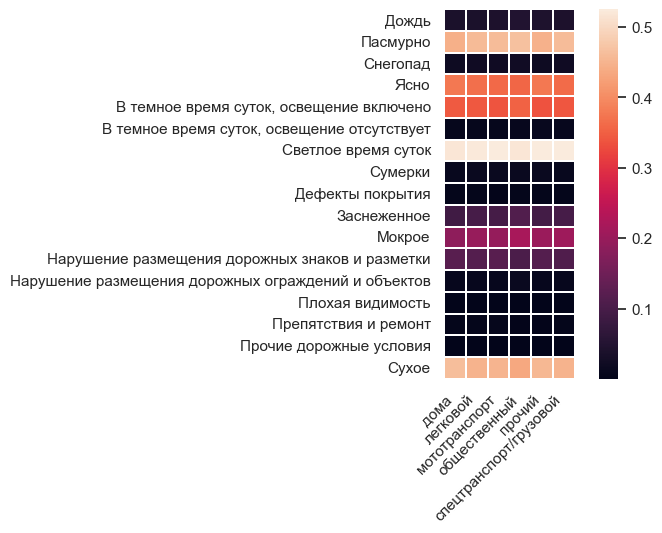

In [69]:
sns.heatmap(data = conditions_grouped_norm.drop('Total').T, square = True, linecolor = 'white', linewidths = 0.05)
plt.xlabel('')
plt.xticks(rotation = 45, ha = 'right');

В целом, для всех видов транспорта характерно, что ДТП происходят в основном в Пасмурную погоду, в Светлое время суток на Сухом покрытии.

Но т.к. в ДТП одновременно указываются сразу несколько характеристик - Освещение, Погодные условия, Дорожные условия, посмотрим на совмещенные графики этих трех характеристик. Нам интересен только мототранспорт.

In [70]:
moto_weather_light = df_cap.query('transport_category == "мототранспорт"').groupby('weather')['В темное время суток, освещение включено','В темное время суток, освещение отсутствует','Светлое время суток','Сумерки'].sum()

In [71]:
moto_weather_road_condition = df_cap.query('transport_category == "мототранспорт"').groupby('weather')['Дефекты покрытия','Заснеженное','Мокрое','Нарушение размещения дорожных знаков и разметки','Нарушение размещения дорожных ограждений и объектов','Плохая видимость','Препятствия и ремонт','Прочие дорожные условия','Сухое'].sum()


In [72]:
moto_light_road_condition = df_cap.query('transport_category == "мототранспорт"').groupby('light')['Дефекты покрытия','Заснеженное','Мокрое','Нарушение размещения дорожных знаков и разметки','Нарушение размещения дорожных ограждений и объектов','Плохая видимость','Препятствия и ремонт','Прочие дорожные условия','Сухое'].sum()


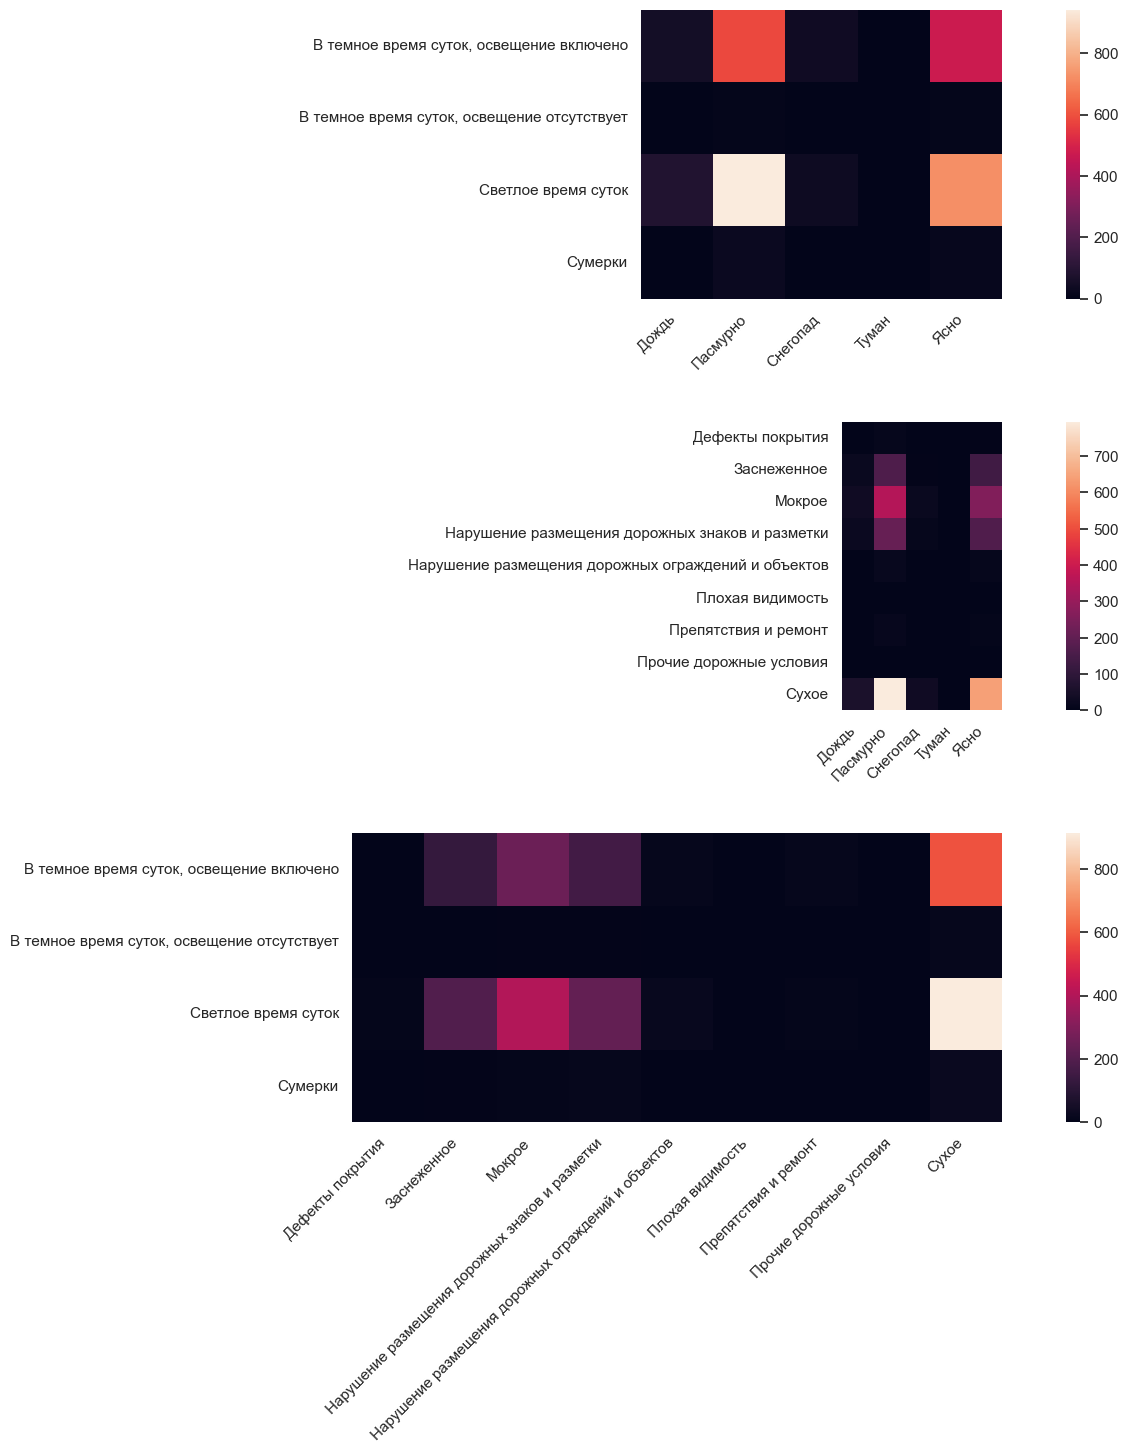

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 1, nrows = 3, figsize = (16,16))

sns.heatmap(data = moto_weather_light.T, square = True, ax = ax1)
sns.heatmap(data = moto_weather_road_condition.T, square = True, ax = ax2)
sns.heatmap(data = moto_light_road_condition, square = True, ax = ax3)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45, ha = 'right')
    plt.xlabel(None)
    plt.ylabel(None)
    
fig.tight_layout(pad=5.0, w_pad=2.0, h_pad=3.0);

Интересно, что, согласно всем графикам, большая часть ДТП на мотоциклах происходит при, казалось бы, благоприятных условиях - Пасмурная или Ясная погода, нет осадков, Сухое дорожное покрытие, в Светлое время суток или при хорошем освещении.

Но это может быть также связано с тем, что мотоциклисты в принципе предпочитают выезжать в сухую ясную или пасмурную погоду без осадков, а также избегают неосвещенных дорог.

В то же время на общей тепловой карте видно, что такая тенденция частоты ДТП характерна для всех видов транспорта.

### Влияние характеристик транспорта и водителя на количество ДТП

In [74]:
df_cap.head()

id                                     light       region   weather  \
0  1578215  В темное время суток, освещение включено    Хамовники  Пасмурно   
1  1578237                       Светлое время суток  Пресненский      Ясно   
2  1578234  В темное время суток, освещение включено  Пресненский      Ясно   
3  1578239  В темное время суток, освещение включено    Мещанский      Ясно   
4  1578252                       Светлое время суток    Таганский      Ясно   

                   reason            datetime     severity  dead_count  \
0       Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
1  Наезд на велосипедиста 2016-08-11 13:55:00       Легкий           0   
2            Столкновение 2016-08-12 21:45:00       Легкий           0   
3       Наезд на пешехода 2016-08-29 00:05:00      Тяжёлый           0   
4            Столкновение 2016-08-04 18:00:00       Легкий           0   

   injured_count parent_region  participants_count          role   gender  \
0              0        Москва                   2      Водитель  Мужской   
1              1        Москва                   2  Велосипедист  Мужской   
2              1        Москва                   2      Водитель  Мужской   
3              1        Москва                   2      Водитель  Мужской   
4              1        Москва                   2      Водитель  Мужской   

                                       health_status  \
0                                       Не пострадал   
1  Раненый, находящийся (находившийся)  на амбула...   
2                                       Не пострадал   
3  Раненый, находящийся (находившийся)  на амбула...   
4                                       Не пострадал   

   years_of_driving_experience    year   brand              model  \
0                          9.0  2015.0     BMW  Прочие модели BMW   
1                          NaN     NaN     NaN                NaN   
2                         16.0  2016.0  TOYOTA              Camry   
3                         11.0  2015.0   SKODA              Rapid   
4                         15.0  2008.0  TOYOTA       Land Cruiser   

                                      transport        lat       long  \
0                                     Мотоциклы  55.743458  37.601433   
1                                    Велосипеды  55.769690  37.581560   
2  С-класс (малый средний, компактный) до 4,3 м  55.754358  37.611988   
3                      В-класс (малый) до 3,9 м  55.037200  37.583100   
4                      В-класс (малый) до 3,9 м  55.736400  37.698600   

  transport_category                              road_condition_char  Дождь  \
0      мототранспорт                                            Сухое      0   
1             прочий  Нарушение размещения дорожных знаков и разметки      0   
2           легковой                                            Сухое      0   
3           легковой                                            Сухое      0   
4           легковой                                            Сухое      0   

   Пасмурно  Снегопад  Ясно  В темное время суток, освещение включено  \
0         1         0     0                                         1   
1         0         0     1                                         0   
2         0         0     1                                         1   
3         0         0     1                                         1   
4         0         0     1                                         0   

   В темное время суток, освещение отсутствует  Светлое время суток  Сумерки  \
0                                            0                    0        0   
1                                            0                    1        0   
2                                            0                    0        0   
3                                            0                    0        0   
4                                            0                    1        0   

   Дефекты покрытия  Заснеженное 

Посмотрим как распределяются ДТП в зависимости от пола водителя.

In [75]:
df_gender = df_cap.pivot_table(index = 'gender', columns = 'transport_category', values = 'id', aggfunc = 'count')
df_gender.loc[:,'total'] = df_gender.sum(axis = 1)

In [76]:
#создадим строки с относительными значениями

df_gender.loc['Женский_prct',:] = df_gender.loc['Женский',:]/(df_gender.loc['Женский',:] + df_gender.loc['Мужской',:])
df_gender.loc['Мужской_prct',:] = df_gender.loc['Мужской',:]/(df_gender.loc['Женский',:] + df_gender.loc['Мужской',:])

In [77]:
df_gender

transport_category         дома      легковой  мототранспорт  общественный  \
gender                                                                       
Женский             1855.000000  14650.000000     318.000000    710.000000   
Мужской             3315.000000  40028.000000    2678.000000    456.000000   
Женский_prct           0.358801      0.267932       0.106142      0.608919   
Мужской_prct           0.641199      0.732068       0.893858      0.391081   

transport_category       прочий  спецтранспорт/грузовой         total  
gender                                                                 
Женский              253.000000              233.000000  18019.000000  
Мужской             1562.000000             6009.000000  54048.000000  
Женский_prct           0.139394                0.037328      0.250031  
Мужской_prct           0.860606                0.962672      0.749969

Женщин-водителей на всех видах транспорта, кроме общественного, возможно, в принципе меньше, чем мужчин, поэтому сделать вывод о том, что женщины аккуратнее мужчин-водителей, на основании того, что процент ДТП с участием женщин ниже, нельзя.

Аналогично посмотрим распределение ДТП по брендам мотоциклов.

In [78]:
df_moto_brand = df_cap.query('transport_category == "мототранспорт"').groupby('brand').agg({'id':'count'}).reset_index().sort_values(by = 'id', ascending = False)
df_moto_brand.head(5)

brand   id
23     HONDA  859
58    YAMAHA  583
52    SUZUKI  373
8        BMW  282
32  KAWASAKI  277

Очень много брендов мотоциклов в единичном экземпляре. Соберем все бренды, количество ДТП по которым менее 20 в группу Прочие марки мотоциклов.

In [79]:
df_moto_brand_rare = df_moto_brand.query('id < 20')


In [80]:
df_cap.loc[(df_cap['transport_category'] == 'мототранспорт') & (df_cap['brand'].isin(df_moto_brand_rare['brand'])), 'brand'] = 'Прочие марки мотоциклов'
df_cap.loc[(df_cap['transport_category'] == 'мототранспорт') & (df_cap['brand'] == 'Прочие марки ТС'), 'brand'] = 'Прочие марки мотоциклов'

In [81]:
df_moto_brand = df_cap.query('transport_category == "мототранспорт"').groupby('brand').agg({'id':'count'}).reset_index().sort_values(by = 'id', ascending = False)
df_moto_brand.loc[:,'prct'] = round(df_moto_brand.loc[:,'id']/df_moto_brand['id'].sum(),2)
df_moto_brand

brand   id  prct
4                     HONDA  859  0.29
10                   YAMAHA  583  0.20
7                    SUZUKI  373  0.13
11  Прочие марки мотоциклов  313  0.11
1                       BMW  282  0.09
5                  KAWASAKI  277  0.09
3           HARLEY-DAVIDSON   89  0.03
6                       KTM   59  0.02
2                    DUCATI   58  0.02
8                       SYM   34  0.01
9                   TRIUMPH   30  0.01
0                   APRILIA   21  0.01

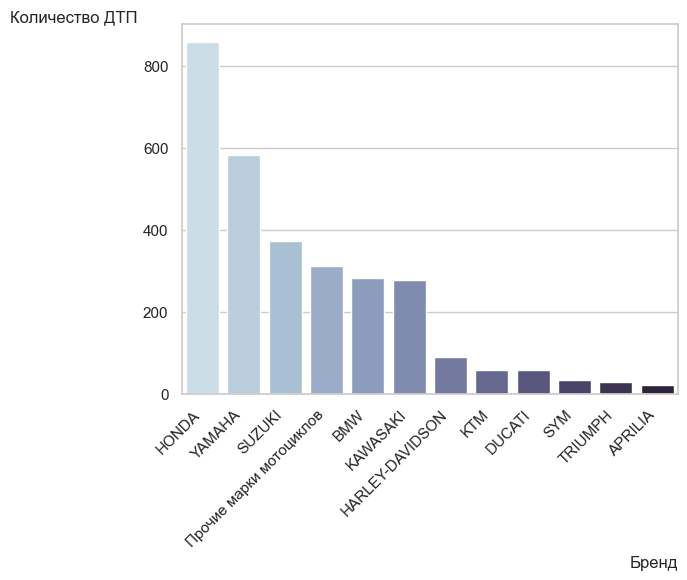

In [82]:
sns.barplot(data = df_moto_brand, x = 'brand', y = 'id', palette = "ch:s=.25,rot=-.25")
plt.xlabel('Бренд', loc = 'right')
plt.ylabel('Количество ДТП', loc = 'top', rotation = 0)
plt.xticks(rotation =45, ha = 'right');

По сути эта информация также носит чисто информативный характер, т.к., как и в случае с полом, без информации о количестве марок мотоциклов на дороге, нельзя оценить в какой степени тот или иной бренд более аварийноопасен. Мотоциклы Honda, Yamaha и Suzuki по информации от сообщества мотоциклистов - абсолютные лидеры по популярности на дорогах.

А вот информация о возрасте ТС может быть показательной. Ее мы будем анализировать только по мототранспорту.

In [83]:
#заполним пропуски нулями для удобства построения графика, т.к. количество пропусков не очень большое

df_cap['year'] = df_cap['year'].fillna(0).astype(int)

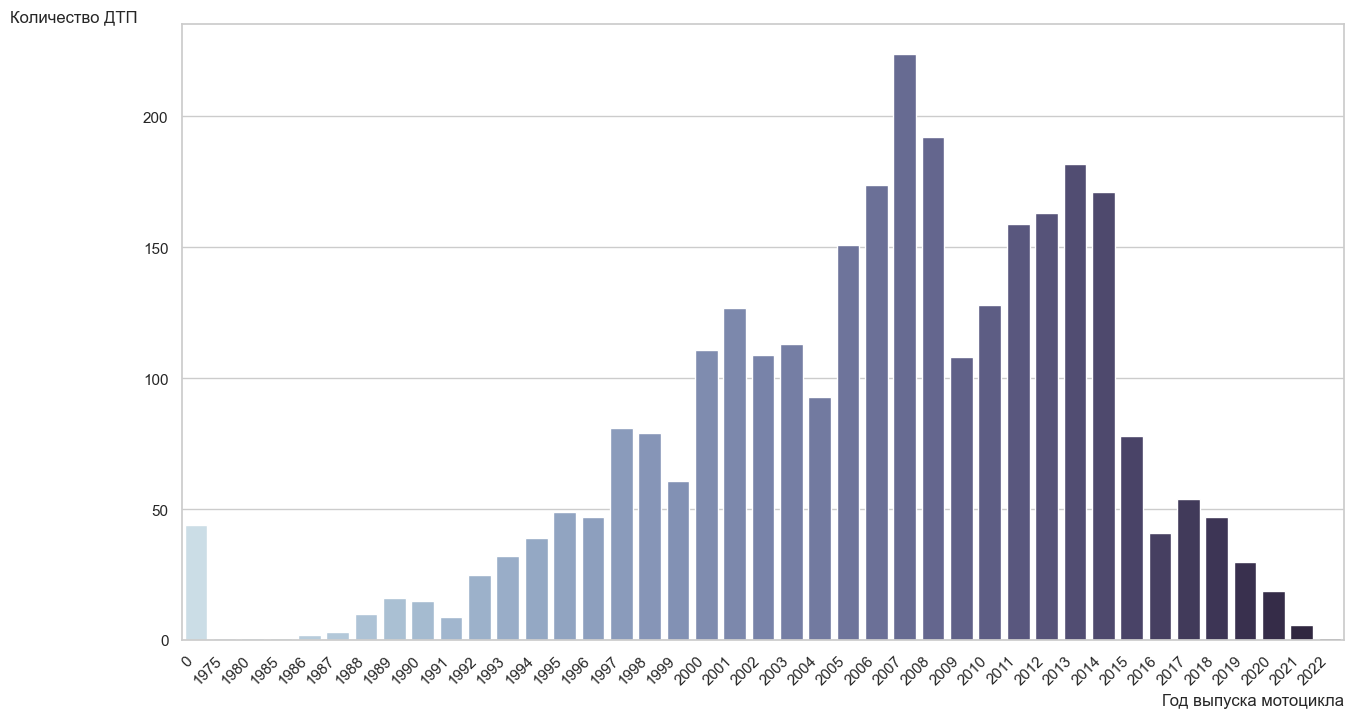

In [84]:
fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(data = df_cap.query('transport_category == "мототранспорт"').groupby('year').agg({'id':'count'})
            .reset_index().sort_values(by = 'year'), x = 'year', y = 'id', palette = "ch:s=.25,rot=-.25")
plt.xlabel('Год выпуска мотоцикла', loc = 'right')
plt.ylabel('Количество ДТП', loc = 'top', rotation = 0)
plt.xticks(rotation =45, ha = 'right');

Больше всего аварий возникает с мотоциклами 2007 года выпуска. Возможно, их также больше всего на дороге, но на фоне в два раза меньшего количества ДТП с мотоциклами 2009 года выпуска можно предполагать, что может иметь место и какая-то иная причина.

Осталось посмотреть на зависимость ДТП от стажа вождения. Эту информацию будем смотреть по всем видам ТС, т.к. зависимость, скорее всего, аналогичная для всех видов.

In [85]:
years_exp = df_cap.groupby('years_of_driving_experience')['id'].count().reset_index()

In [86]:
years_exp['years_of_driving_experience'] = years_exp['years_of_driving_experience'].astype(int)

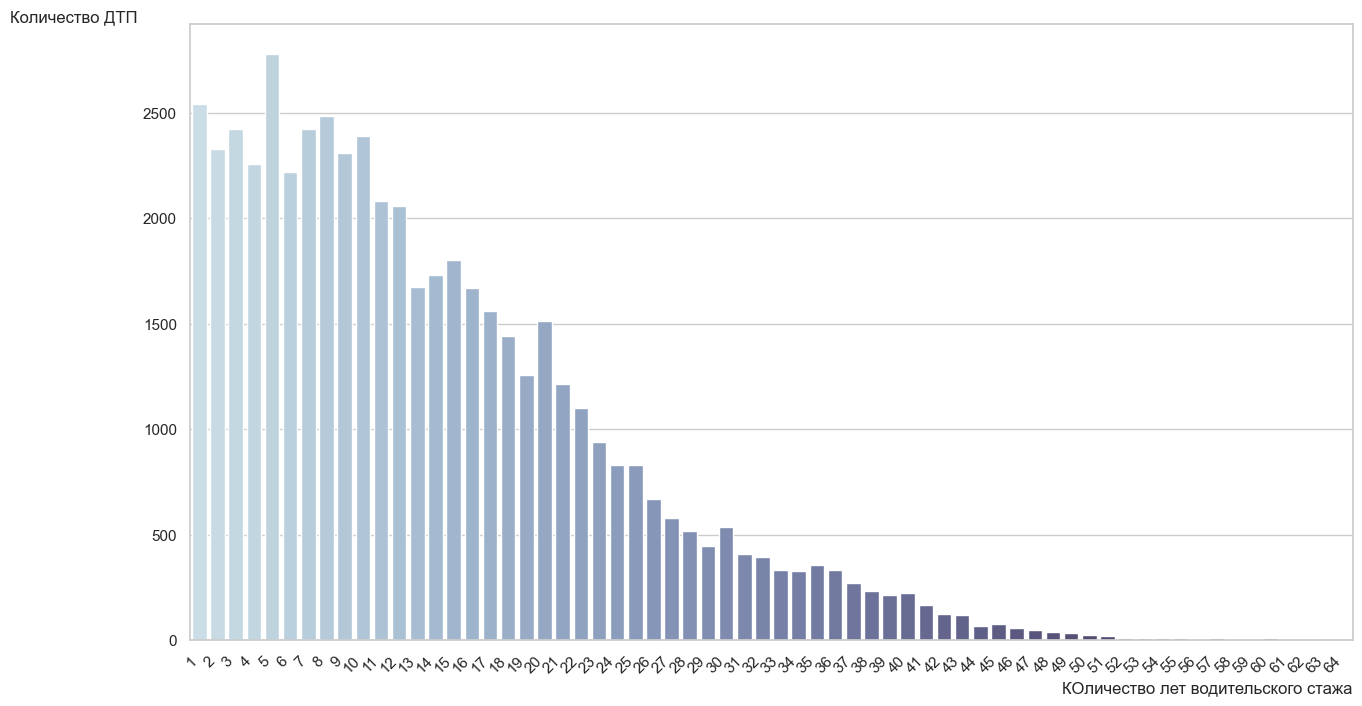

In [87]:
fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(data = years_exp, x = 'years_of_driving_experience', y = 'id', palette = "ch:s=.25,rot=-.25")
plt.xlabel('Количество лет водительского стажа', loc = 'right')
plt.ylabel('Количество ДТП', loc = 'top', rotation = 0)
plt.xticks(rotation =45, ha = 'right');

Распределение ДТП по стажу вождения в таком виде достаточно закономерно. Во-первых, водителей с очень большим стажем вождения в принципе мало. Во-вторых, большой стаж вождения, как правило, равен более высокому навыку вождения и, как следствие, более редким ДТП.

## Места наибольшего скопления ДТП с участием мотоциклов

In [88]:
#для построения карт нужно избавиться от пропусков. На распределение они вряд ли повлияют, а построить карты с ними нельзя

df_moto = df_cap.query('transport_category == "мототранспорт"').dropna()

In [89]:
df_moto.head(3)

id                                     light              region  \
0   1578215  В темное время суток, освещение включено           Хамовники   
6   1569836                       Светлое время суток     Бескудниковский   
94  1576752  В темное время суток, освещение включено  Восточное Дегунино   

     weather             reason            datetime     severity  dead_count  \
0   Пасмурно  Наезд на пешехода 2016-08-30 20:40:00  С погибшими           1   
6   Пасмурно  Наезд на пешехода 2016-03-25 15:45:00       Легкий           0   
94  Пасмурно  Наезд на пешехода 2016-09-30 04:15:00       Легкий           0   

    injured_count parent_region  participants_count      role   gender  \
0               0        Москва                   2  Водитель  Мужской   
6               1        Москва                   2  Водитель  Мужской   
94              1        Москва                   2  Водитель  Мужской   

                                        health_status  \
0                                        Не пострадал   
6   Раненый, находящийся (находившийся)  на амбула...   
94  Раненый, находящийся (находившийся)  на амбула...   

    years_of_driving_experience  year     brand              model  transport  \
0                           9.0  2015       BMW  Прочие модели BMW  Мотоциклы   
6                           1.0  2000  KAWASAKI                 ZX  Мотоциклы   
94                          1.0  2007    SUZUKI                GSX  Мотоциклы   

          lat       long transport_category road_condition_char  Дождь  \
0   55.743458  37.601433      мототранспорт               Сухое      0   
6   55.875300  37.531100      мототранспорт               Сухое      0   
94  55.895600  37.555600      мототранспорт         Заснеженное      0   

    Пасмурно  Снегопад  Ясно  В темное время суток, освещение включено  \
0          1         0     0                                         1   
6          1         0     0                                         0   
94         1         0     0                                         1   

    В темное время суток, освещение отсутствует  Светлое время суток  Сумерки  \
0                                             0                    0        0   
6                                             0                    1        0   
94                                            0                    0        0   

    Дефекты покрытия  Заснеженное  Мокрое  \
0                  0            0       0   
6                  0            0       0   
94                 0            1       0   

    Нарушение размещения дорожных знаков и разметки  \
0                                                 0   
6                                                 0   
94                                                0   

    Нарушение размещения дорожных ограждений и объектов  Плохая видимость  \
0                                                   0                   0   
6                                                   0                   0   
94                                                  0                   0   

    Препятствия и ремонт  Прочие дорожные условия  Сухое  accident_year  
0                      0                        0      1           2016  
6                      0                        0      1           2016  
94                     0                        0      0           2016

In [90]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
# создаём объект m – карту с центром в точке с координатами [moscow_lat, moscow_lng]
m = folium.Map(location=[moscow_lat, moscow_lng])

In [91]:
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['long']],
        popup=f"Участников {row['participants_count']}, Погибших {row['dead_count']}",
    ).add_to(marker_cluster)

df_moto.apply(create_clusters, axis=1)

m

In [92]:
#оставим в датасете с границами районов только название и координаты

regions = regions.drop(['OKATO','OKTMO','NAME_AO','OKATO_AO','ABBREV_AO','TYPE_MO'], axis = 1)
regions

NAME  \
0                     Киевский   
1               Филёвский Парк   
2              Новофёдоровское   
3                    Роговское   
4                 "Мосрентген"   
5                  Вороновское   
6          Михайлово-Ярцевское   
7                 Марушкинское   
8                 Первомайское   
9                    Матушкино   
10                     Внуково   
11                     Савёлки   
12                  Внуковское   
13                      Силино   
14                   Кокошкино   
15                     Крюково   
16                      Щукино   
17             Краснопахорское   
18           Нагатинский Затон   
19              Старое Крюково   
20                  Клёновское   
21                 Дмитровский   
22              Филимонковское   
23                      Троицк   
24                 Тёплый Стан   
25                   Щаповское   
26                  Московский   
27                 Десёновское   
28                     Ховрино   
29               Ломоносовский   
30                   Можайский   
31            Ново-Переделкино   
32                    Строгино   
33              Молжаниновский   
34                      Митино   
35                     Куркино   
36                  Крылатское   
37                    Солнцево   
38                   Сосенское   
39               Воскресенское   
40                 Головинский   
41                Южное Тушино   
42             Северное Тушино   
43                   Черёмушки   
44        Покровское-Стрешнево   
45           Хорошёво-Мнёвники   
46         Очаково-Матвеевское   
47          Тропарёво-Никулино   
48                Левобережный   
49              Фили-Давыдково   
50                 Обручевский   
51                 Рязановское   
52                     Раменки   
53                  Войковский   
54                       Сокол   
55           Западное Дегунино   
56        Проспект Вернадского   
57                Южное Бутово   
58                     Ясенево   
59                Дорогомилово   
60                    Коньково   
61                 Хорошёвский   
62                     Беговой   
63                     Коптево   
64                    Щербинка   
65                    Аэропорт   
66                 Пресненский   
67                    Северный   
68             Бескудниковский   
69                 Гагаринский   
70               Тимирязевский   
71             Северное Бутово   
72                   Лианозово   
73                   Хамовники   
74          Восточное Дегунино   
75                 Савёловский   
76               Академический   
77                      Зюзино   
78                Алтуфьевский   
79                     Марфино   
80       Чертаново Центральное   
81                    Отрадное   
82                       Арбат   
83             Чертаново Южное   
84                   Бутырский   
85                    Тверской   
86          Чертаново Северное   
87                    Якиманка   
88                    Котловка   
89                Останкинский   
90                     Донской   
91                    Бибирево   
92           Бирюлёво Западное   
93                Марьина Роща   
94                    Нагорный   
95                    Свиблово   
96                 Даниловский   
97                   Мещанский   
98            Южное Медведково   
99               Замоскворечье   
100        Северное Медведково   
101         Нагатино-Садовники   
102       Москворечье-Сабурово   
103                   Царицыно   
104                  Басманный   
105             Красносельский   
106                  Ростокино   
107                  Таганский   
108               Алексеевский   
109                 Сокольники   
110         Бирюлёво Восточное   
111               Бабушкинский   
112               Южнопортовый   
113                Ярославский   
114                  Печатники   
115                Богородское   
116               Метрогородок   
117           

In [93]:
region_acc = df_cap.groupby('region')['id'].count().reset_index().sort_values(by = 'id', ascending = False)
region_acc

region    id
23                 Выхино-Жулебино  1114
58                         Люблино  1080
140                   Южное Бутово  1049
115                     Спецтрассы  1041
94                     Пресненский  1008
62                         Марьино   968
27                     Даниловский   953
66                          Митино   947
26                       Гольяново   946
130              Хорошево-Мневники   939
117                       Строгино   928
87             Очаково-Матвеевское   905
68                       Можайский   880
10              Бирюлево Восточное   844
31                    Дорогомилово   824
51                         Кунцево   821
146                        Ясенево   821
96                         Раменки   820
86                        Отрадное   804
119                       Тверской   788
107                Северное Тушино   773
89                          Перово   759
36                      Ивановское   745
71                      Московский   740
136                Чертаново Южное   740
128                      Хамовники   719
84          Орехово-Борисово Южное   714
111                 Соколиная гора   713
124             Тропарево-Никулино   705
142                   Южное Тушино   700
42                        Коньково   696
114                      Сосенское   692
30                         Донской   681
121                    Теплый Стан   675
54                       Лефортово   666
145                    Ярославский   647
9                         Бибирево   640
73              Нагатино-Садовники   639
118                      Таганский   636
131                    Хорошевский   634
15                         Вешняки   629
106            Северное Медведково   616
37                       Измайлово   614
139                         Щукино   613
122                  Тимирязевский   606
24                     Гагаринский   582
55                       Лианозово   577
70            Москворечье-Сабурово   574
85                    Останкинский   572
50                       Кузьминки   567
34                          Зюзино   564
29                     Дмитровский   543
126                 Фили-Давыдково   541
44                Косино-Ухтомский   541
105             Северное Измайлово   539
25                     Головинский   535
6                        Басманный   531
0                    Академический   525
61                    Марьина роща   522
83       Орехово-Борисово Северное   521
75                        Нагорный   521
135          Чертаново Центральное   520
91            Покровское-Стрешнево   511
33               Западное Дегунино   507
134             Чертаново Северное   507
4                         Аэропорт   495
120                   Текстильщики   490
113                       Солнцево   489
49                         Крюково   487
5                     Бабушкинский   480
132                       Царицыно   477
112                     Сокольники   475
65                       Мещанский   474
101                    Савеловский   470
90                       Печатники   464
143                   Южнопортовый   462
1                     Алексеевский   461
48                      Крылатское   460
133                      Черемушки   459
79                     Новогиреево   453
11               Бирюлево Западное   452
93                  Преображенское   450
7                          Беговой   432
57                Лосиноостровский   420
100                      Рязанский   416
104                Северное Бутово   412
82                     Обручевский   411
129                        Ховрино   410
78                Ново-Переделкино   410
18                      Войковский   403
80                      Новокосино   401
53                    Левобережный   400
43                         Коптево   397
95            Проспект Вернадского   389
38                         Капотня   388
32                   Замоскворечье   381
13                        Братеево   380
8         

In [94]:
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=regions,
    data=region_acc,
    columns=['region', 'id'],
    key_on='properties.NAME',
    fill_color='Oranges',
    fill_opacity=0.5,
    legend_name='Количество ДТП по районам',
).add_to(m)

m

Интересно, что много ДТП происходило в пределах центра Москвы - Садового кольца.  
Но больше всего ДТП происходило в ЮВАО - районы Выхино-Жулебино, Люблино, Марьино.
Проконсультировавшись с представителями мотосообщества, стало понятно, что наибольшую опасность для мототранспорта представляют перекрестки, выезды из дворовых территорий и т.п., тогда как скоростные магистрали не так опасны. 

## Анализ ДТП в динамике за период наблюдений

In [95]:
acc_year = df_cap.groupby(['accident_year','transport_category'])['id'].count().reset_index()
acc_year = acc_year.drop(acc_year[acc_year['accident_year'] == 2023].index) # т.к. данных за 2023 год еще мало, уберем его

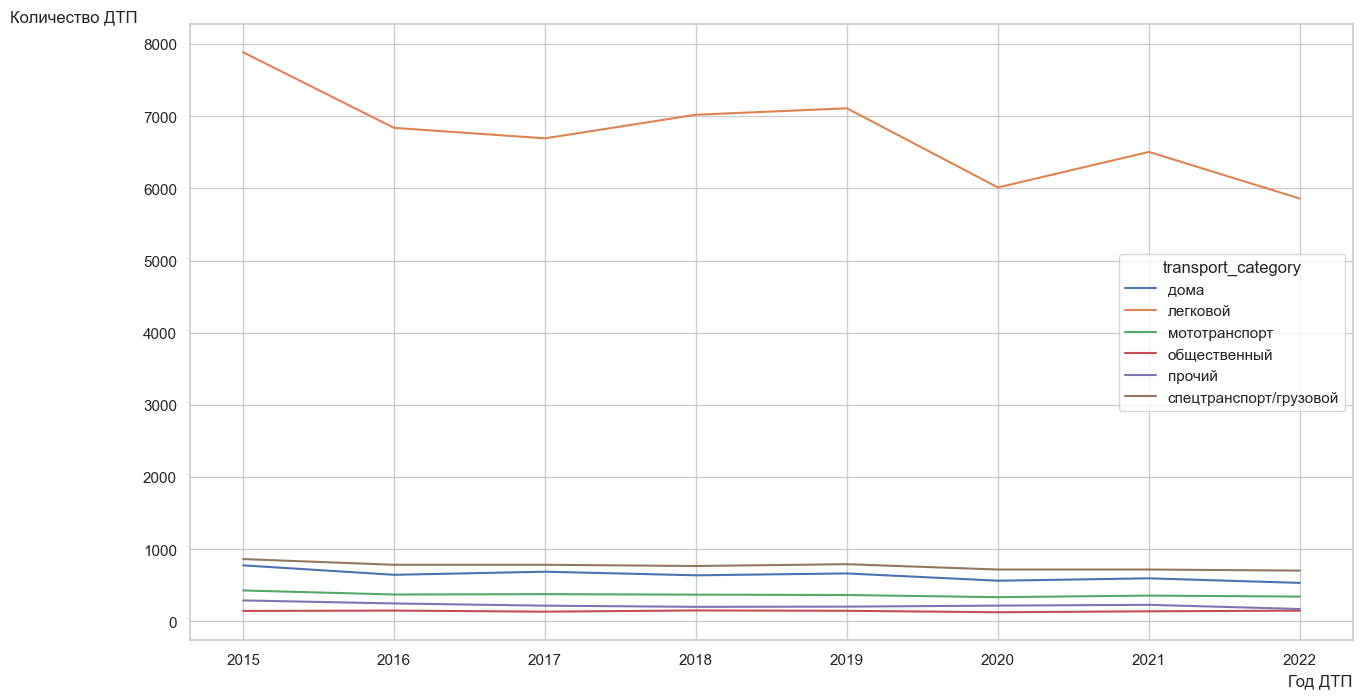

In [96]:
fig,ax = plt.subplots(figsize = (15,8))
sns.lineplot(data = acc_year, x = 'accident_year',y = 'id', hue = 'transport_category')
plt.xlabel('Год ДТП', loc = 'right')
plt.ylabel('Количество ДТП', loc = 'top', rotation = 0);

Количество ДТП на всех видах транспорта практически не меняется год от года, за исключением легкового транспорта. Количество ДТП с легковым транспортом уменьшилось на 25% за период 7 лет. 

Посмотрим как обстоит ситуация со смертностью.

In [97]:
dead_year = df_cap.groupby(['accident_year'])['dead_count'].sum().reset_index()
dead_year = dead_year.drop(dead_year[dead_year['accident_year'] == 2023].index)

In [98]:
dead_moto_year = df_moto.groupby(['accident_year'])['dead_count'].sum().reset_index()
dead_moto_year = dead_moto_year.drop(dead_moto_year[dead_moto_year['accident_year'] == 2023].index)

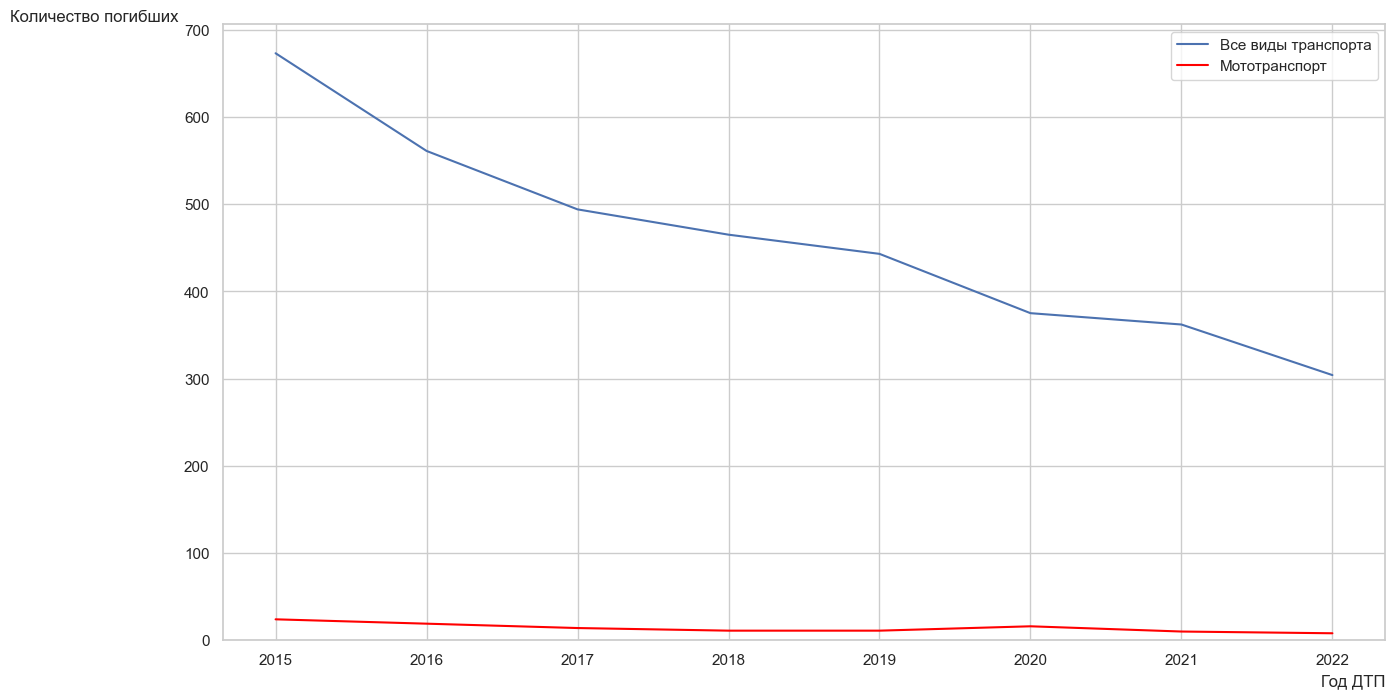

In [99]:
fig,ax = plt.subplots(figsize = (15,8))
sns.lineplot(data = dead_year, x = 'accident_year',y = 'dead_count')
sns.lineplot(data = dead_moto_year, x = 'accident_year',y = 'dead_count', color = 'red')
plt.xlabel('Год ДТП', loc = 'right')
plt.ylabel('Количество погибших', loc = 'top', rotation = 0)
ax.set_ylim(ymin=0)
plt.legend({'Все виды транспорта':'blue',
            'Мототранспорт':'red'});

Тогда как общий уровень смертности в ДТП снизился в более, чем 2 раза, смертность в ДТП с мотоциклами снизилась в 3 раза с 2015 по 2022 год.

## Выводы

Большое количество легкового транспорта в сравнении с другими видами транспортных средств обуславливает гораздо большее абсолютное количество ДТП с его участием - 75% всех ДТП приходится на легковой транспорт.
На мототранспорт приходится всего 4% всех ДТП в Москве.

Проведя работу по сбору данных о количестве транспортных средств категорий Легковые автомобили и Мототранспорт, удалось собрать всего несколько цифр. На основе полученных данных относительное количество ДТП на мототранспорте более чем в 2 раза выше относительного количества ДТП с легковыми автомобилями - 17% против 39%.

Что касается смертности в ДТП, то этот показатель практически одинаково распределен между всеми видами - 95% ДТП на каждом из видов обходятся без жертв, 4-4,5% - с одной смертью.  
Аналогично распределяются ДТП по степени тяжести - между видами транспорта почти нет различий - ~70% - ДТП легкой степени, 23-25% - тяжелые ДТП, 4-5% - смертельные.

Интересно, что подавляющее большинство ДТП происходит в Пасмурную либо Ясную погоду, без осадков, на Сухом покрытии в Светлое время суток, либо при включенном освещении в Темное.

Без данных об общем количестве категорий водителей или брендов транспорта на дорогах сложно судить о том, кто из водителей, женщины или мужчины, более аккуратны на дорогах, какие производители собирают более надежный транспорт.
Тем не менее, данные говорят о том, что ДТП с участием женщин на всех видах транспорта всего 25%. На мототранспорте - 11%. Но очень вероятно, что это обусловлено именно меньшим количество женщин за рулем, особенно среди мототранспорта.

Лиерами по аварийности среди брендов мотоциклов являются Honda (29%), Yamaha (20%), Suzuki (13%). Но их также больше всего на дорогах.

Больше всего ДТП среди мототранспорта происходит с мотоциклами 2007 года выпуска.
Также на количество ДТП влияет стаж вождения - чем он больше, тем меньше количество ДТП.

Больше всего ДТП происходит в ЮВАО - районы Выхино-Жулебино, Люблино, Марьино. Также много ДТП в центре Москвы - районы Пресненский, Даниловский.

За период 2015-2022 год включительно количество ДТП на всех видах транспорта почти не изменилось, кроме легкового транспорта - количество ДТП уменьшилось на 25%.и

Что касается смертельных ДТП, то количество ДТП по всем видам транспорта за этот период снизилось более чем в 2 раза. А на мотоциклах - в 3 раза.